In [1]:
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
import os
# os.listdir('/kaggle/input')
import spacy

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /Users/siddanta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/siddanta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/siddanta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/siddanta/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
def filter_rows(chunk):
    return chunk[chunk['language_cld3'] == 'en']

# Read the CSV file in chunks and filter rows with 'en'
filtered_chunks = []
chunk_size = 10000  # Adjust this value based on your memory constraints

for chunk in pd.read_csv('final project/song_lyrics.csv', chunksize=chunk_size):
    filtered_chunk = filter_rows(chunk)
    filtered_chunks.append(filtered_chunk)

# Concatenate the filtered chunks into a single DataFrame
filtered_data = pd.concat(filtered_chunks, ignore_index=True)

In [5]:
filtered_data

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",1,en,en,en
1,Can I Live,rap,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",3,en,en,en
2,Forgive Me Father,rap,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...,4,en,en,en
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...,5,en,en,en
4,Fly In,rap,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",6,en,en,en
...,...,...,...,...,...,...,...,...,...,...,...
3399988,Everything Is Alright Now,pop,Chuck Bernard,2013,2,{},"Everything is alright now\nOh yes, baby\nEvery...",7882838,en,en,en
3399989,White Lies,pop,ElementD,2019,1,"{""Harley Bird""}",[Verse 1]\nHalf truth and half you\nDidn't we ...,7882840,en,en,en
3399990,Ocean,pop,Effemar,2022,3,{},[Verse 1]\nDance for me now\nKeeping yourself ...,7882842,en,en,en
3399991,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016,3,"{Elex,""Culture Code / Pag & Mylo""}",[Verse 1]\nHere our purpose feels alive\nWe ar...,7882845,en,en,en


In [9]:
df = filtered_data[['title','tag','artist','year','views','features','lyrics']]
df.rename(columns={'tag': 'genre'}, inplace=True)
df = df[(df['year'] <2024) & (df['year'] > 1990)]
df = df.reset_index(drop=True)
# Convert the 'date' column to datetime type (if not already in datetime type)
df['year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce')

/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_50437/2404264321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'tag': 'genre'}, inplace=True)


In [10]:
df

,title,genre,artist,year,views,features,lyrics
0,Killa Cam,rap,Cam'ron,2004-01-01,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki..."
1,Can I Live,rap,JAY-Z,1996-01-01,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,..."
2,Forgive Me Father,rap,Fabolous,2003-01-01,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...
3,Down and Out,rap,Cam'ron,2004-01-01,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...
4,Fly In,rap,Lil Wayne,2005-01-01,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ..."
...,...,...,...,...,...,...,...
3145477,Everything Is Alright Now,pop,Chuck Bernard,2013-01-01,2,{},"Everything is alright now\nOh yes, baby\nEvery..."
3145478,White Lies,pop,ElementD,2019-01-01,1,"{""Harley Bird""}",[Verse 1]\nHalf truth and half you\nDidn't we ...
3145479,Ocean,pop,Effemar,2022-01-01,3,{},[Verse 1]\nDance for me now\nKeeping yourself ...
3145480,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016-01-01,3,"{Elex,""Culture Code / Pag & Mylo""}",[Verse 1]\nHere our purpose feels alive\nWe ar...


In [11]:
df.describe()

,views
count,3.145482e+06
mean,3.637666e+03
std,5.647433e+04
min,0.000000e+00
25%,2.100000e+01
50%,8.300000e+01
75%,4.510000e+02
max,1.757563e+07


## Artist Contribution

In [12]:
top_10_artists = df.groupby('artist')['views'].sum().sort_values(ascending=False)
top_10_artists.head(15)

artist
Drake                          290162939
Eminem                         199872883
Kanye West                     165409187
Genius English Translations    164330365
Kendrick Lamar                 148672204
The Weeknd                     118923729
Taylor Swift                    99106550
J. Cole                         95502182
XXXTENTACION                    90833906
Ariana Grande                   74327680
Travis Scott                    67504519
Lil Wayne                       65663738
JAY-Z                           64044686
Frank Ocean                     61528210
Beyonc                          59759399
Name: views, dtype: int64

<Axes: title={'center': 'Counts by Year'}, xlabel='Year', ylabel='Counts'>

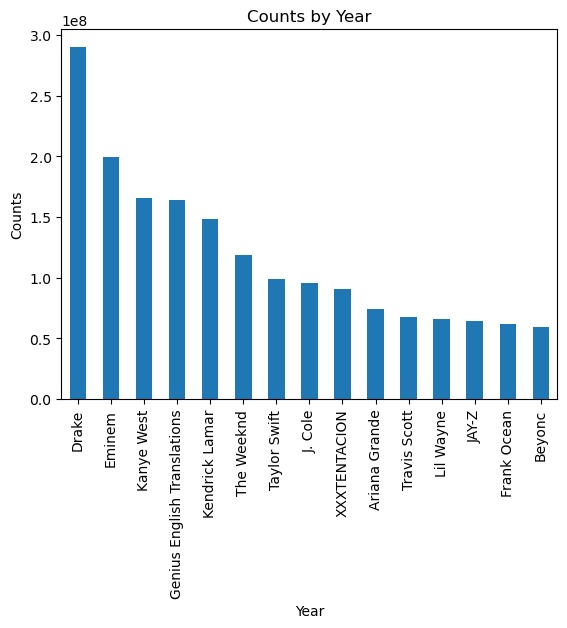

In [13]:
top_10_artists.head(15).plot(kind='bar', xlabel='Year', ylabel='Counts', title='Counts by Year')

In [14]:
artists_by_no_of_songs = df.groupby('artist')['title'].size().sort_values(ascending=False)
artists_by_no_of_songs

artist
Genius English Translations    13531
The Grateful Dead               1467
Abraham Lincoln                 1467
Lil B                           1315
Gucci Mane                      1254
                               ...  
Mornings                           1
DirtyDan and Geez                  1
DirtyDan & Lightskin Hesus         1
DirtyBlak4mb                       1
PicoZoGame                         1
Name: title, Length: 423355, dtype: int64

In [15]:
df[df['artist'] == 'Genius English Translations']

,title,genre,artist,year,views,features,lyrics
49231,Erika - O que sinto por ti ft. Alkappa English...,rap,Genius English Translations,2011-01-01,70,{},Chorus (1)\nI will not say anything but\nBut I...
50892,Stromae - Alors On Danse English Translation,rap,Genius English Translations,2010-01-01,222064,{},[Intro]\nSo we …\nSo we …\nSo we …\n\n[Verse 1...
51558,Alkappa - Dá pra confiar English Translation,rap,Genius English Translations,2011-01-01,48,{},Artist: Alkappa\nLetter: Andrew lando kixindo\...
52023,G-Dragon - 쿠데타 Coup detat ft. Baauer Diplo En...,rap,Genius English Translations,2013-01-01,37096,{},[Intro]\nPeople\nThe revolution will not be te...
53884,Halete Mc - Exacto e errado Translation,rap,Genius English Translations,2012-01-01,52,{},[Verse 1: Halide Mc]\nTou simply wrong because...
...,...,...,...,...,...,...,...
3145398,Foé - Nuria English translation,pop,Genius English Translations,2018-01-01,2,{},[Verse 1]\nMy words tense under your story\nTh...
3145408,Foé - Running English translation,pop,Genius English Translations,2018-01-01,2,{},[Verse 1]\nFeet grazing the sole\nDead bodies ...
3145417,Foé - Mommy,pop,Genius English Translations,2018-01-01,3,{},"[Intro (originally in English)]\nHey mum, hey ..."
3145428,Foé - Edgar English translation,pop,Genius English Translations,2018-01-01,2,{},"[Verse 1]\nYou've got the liver, Edgar\nWith m..."


In [16]:
df = df[df['artist'] != 'Genius English Translations']

In [17]:
df[df['artist'] == 'Abraham Lincoln']

,title,genre,artist,year,views,features,lyrics
79363,The Lyceum Address,misc,Abraham Lincoln,2012-01-01,3016,{},"As a subject for the remarks of the evening, ""..."
111735,The Papers And Writings Of Abraham Lincoln-VOL...,misc,Abraham Lincoln,2013-01-01,3,{},"To N. J. Rockwell.\n\nSpringfield, January 21,..."
111765,The Papers And Writings Of Abraham Lincoln-VOL...,misc,Abraham Lincoln,2013-01-01,10,{},"To Wm. H. Herndon\n\nExecutive Mansion, Washin..."
111859,The Papers And Writings Of Abraham Lincoln-VOL...,misc,Abraham Lincoln,2013-01-01,4,{},Reassuring Son In College\n\nTelegram To Rober...
111883,The Papers And Writings Of Abraham Lincoln-VOL...,misc,Abraham Lincoln,2013-01-01,8,{},Telegram To Governor Gamble.\n\nWar Department...
...,...,...,...,...,...,...,...
1188776,Fourth Debate with Douglas September 18 1858,misc,Abraham Lincoln,2016-01-01,46,{},"Fourth Debate with Stephen Douglas, Charleston..."
1191313,Letter to Joshua Speed August 24 1855,misc,Abraham Lincoln,2016-01-01,5,{},"October 3, 1855 -Letter to Joshua Speed\n\nSpr..."
1191324,August 14 1862 -Abraham Lincoln Remarks on Col...,misc,Abraham Lincoln,2016-01-01,38,{},"August 14, 1862 -Abraham Lincoln, Remarks on C..."
1192116,Letter to Mary Todd Lincoln April 16 1848,misc,Abraham Lincoln,2016-01-01,5,{},"Washington, April 16- 1848-\n\nDear Mary:\nIn ..."


In [18]:
df[df['genre'] == 'misc']

,title,genre,artist,year,views,features,lyrics
660,Penny for a Thought,misc,Saul Williams,2001-01-01,6118,{},Cancel the apocalypse!\nCartons of the milky w...
1264,John 1,misc,Holy Bible (KJV),2017-01-01,3375,{},"John 1:1: In the beginning was the Word, and t..."
1265,John 2,misc,Holy Bible (KJV),2017-01-01,983,{},John 2:1: And the third day there was a marria...
1266,John 3,misc,Holy Bible (KJV),2017-01-01,2129,{},"John 3:1: There was a man of the Pharisees,\nn..."
1352,Her It,misc,John Berryman,2010-01-01,356,{},I fell in love with a girl\nO and a gash\nI'll...
...,...,...,...,...,...,...,...
3145038,Only the sea,misc,Hannah Gira,2022-01-01,3,{},"Rose, harsh rose\nAre you calling me?\nI did n..."
3145063,In Conversation with Eli Intro - Radio Edit,misc,Jarrett Brice,2022-01-01,1,{},"Eli: Now, welcome our first guest; he’s my fri..."
3145387,Vulture,misc,MIND REPLICA,2021-01-01,3,{},i'm a fucking vulture\na fucking vulture for y...
3145411,4 Ways to Have Fun at the Beach,misc,Dave,2022-01-01,0,{},"When it comes to summertime, the beach is alwa..."


In [19]:
df = df[df['genre'] != 'misc']

In [20]:
artists_by_no_of_songs = df.groupby('artist')['title'].size().sort_values(ascending=False)
artists_by_no_of_songs

artist
The Grateful Dead    1467
Lil B                1309
Gucci Mane           1240
Lil Wayne            1213
KIDZ BOP Kids        1209
                     ... 
Fuel Moon               1
Fuel (Hardcore)         1
Omar Adel               1
Fuegowiththesucc        1
Dodger                  1
Name: title, Length: 402929, dtype: int64

<Axes: title={'center': 'Artist Contribution'}, xlabel='Artist', ylabel='No of songs'>

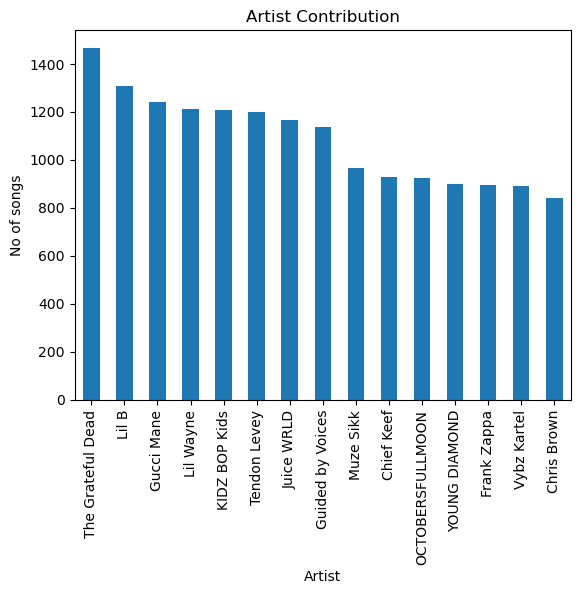

In [29]:
artists_by_no_of_songs.head(15).plot(kind='bar', xlabel='Artist', ylabel='No of songs', title='Artist Contribution')

## Top Songs

In [22]:
df.sort_values(by='views', ascending=False).head(10)

,title,genre,artist,year,views,features,lyrics
164027,Rap God,rap,Eminem,2013-01-01,17575634,{},"[Intro]\n""Look, I was gonna go easy on you not..."
2416782,WAP,rap,Cardi B,2020-01-01,16003444,"{""Megan Thee Stallion""}","[Intro: Cardi B, Al ""T"" McLaran & Megan Thee S..."
1259052,Shape of You,pop,Ed Sheeran,2017-01-01,14569727,{},[Verse 1]\nThe club isn't the best place to fi...
1300237,HUMBLE.,rap,Kendrick Lamar,2017-01-01,11181199,{},[Intro]\nNobody pray for me\nIt been that day ...
312744,The Hills,rb,The Weeknd,2015-01-01,9291775,{},[Intro]\nYeah\nYeah\nYeah\n\n[Verse 1]\nYour m...
1201067,Bad and Boujee,rap,Migos,2016-01-01,9168421,"{""Lil Uzi Vert""}","[Intro: Offset & Future]\nYou know, young rich..."
1434993,Gods Plan,rap,Drake,2018-01-01,9107059,{},[Intro]\nAnd they wishin' and wishin'\nAnd wis...
1658445,SICKO MODE,rap,Travis Scott,2018-01-01,9078511,{Drake},"[Part I]\n\n[Intro: Drake]\nAstro, yeah\nSun i..."
1738682,​thank u next,pop,Ariana Grande,2018-01-01,9072131,{},[Verse 1]\nThought I'd end up with Sean\nBut h...
1400408,Mans Not Hot,rap,Big Shaq,2017-01-01,8690766,{},"[Intro]\nYo\nBig Shaq, the one and only\nMan's..."


## Checking by Year

In [23]:
count_by_year = df.groupby(df['year'].dt.year)['title'].size()

<Axes: title={'center': 'Counts by Year'}, xlabel='Year', ylabel='No of songs'>

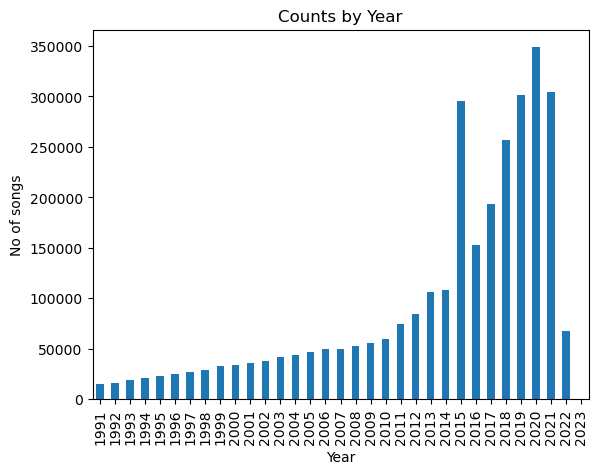

In [28]:
count_by_year.plot(kind='bar', xlabel='Year', ylabel='No of songs', title='Counts by Year')

## Count by genre

In [25]:
count_by_genre = df.groupby(df['genre'])['views'].size()

<Axes: title={'center': 'Genre song distribution'}, xlabel='Genre', ylabel='Number of songs'>

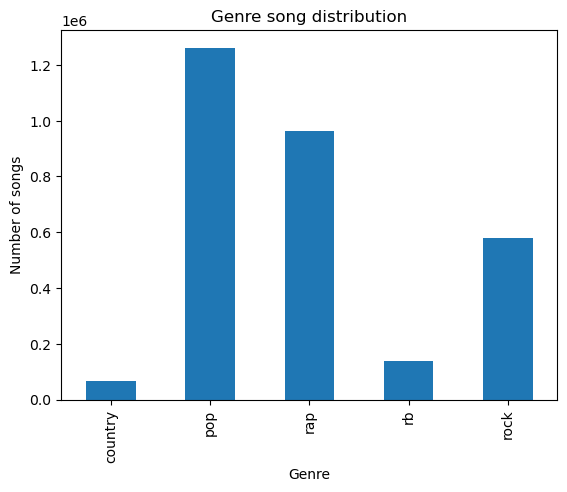

In [27]:
count_by_genre.plot(kind='bar', xlabel='Genre', ylabel='Number of songs', title='Genre song distribution')

In [30]:
# Calculate the total views
total_views = count_by_genre.sum()

# Convert sum of 'views' to percentage relative to total views
percentage_by_genre = (count_by_genre / total_views) * 100

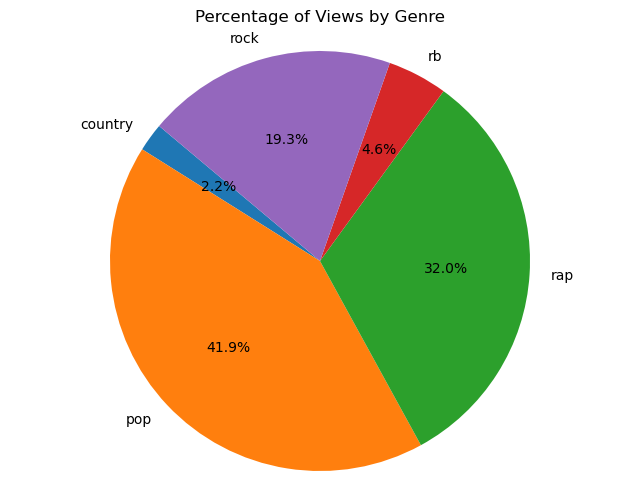

In [31]:
plt.figure(figsize=(8, 6))
plt.pie(percentage_by_genre, labels=percentage_by_genre.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Percentage of Views by Genre')
plt.show()

In [32]:
filterdf = pd.DataFrame()
for i in df['genre'].unique():
    filterdf = pd.concat([filterdf,df[df['genre']==i].nlargest(count_by_genre.min(), 'views')], ignore_index=True)

In [33]:
filterdf = filterdf.sample(frac=1).reset_index(drop=True)
filterdf

,title,genre,artist,year,views,features,lyrics
0,Haunting interlude,rap,clipping.,2019-01-01,9883,{​clipping.},"""After I had moved into my apartment two weeks..."
1,Paint The Town Red,pop,The Mahones,1996-01-01,4103,{},"[Intro]\nYeah\n\n[Verse 1]\nHey there, where y..."
2,We Win Again,country,Steve Caustrita,2021-01-01,20,"{""Stanley Loh""}","We Win Again\n© June 16, 2020 Stan Loh & Steve..."
3,ROBLOXCORE : XD LOL,rap,Various Artists,2020-01-01,8521,"{​dltzk,​twikipedia,Dolly,​lieu}","[Verse 1: Dolly]\nI know you hate me, that's j..."
4,Must Be Nice,rock,Nickelback,2017-01-01,18193,{},"[Verse 1]\nOne step, two step, electric slide\..."
...,...,...,...,...,...,...,...
329350,Will He On the Nyquil Benadryl,rb,Yung Schmoobin,2018-01-01,185,{},"[Intro]\nYah, Yung Schmoobin\nAnd I just like ..."
329351,Home Alone,country,4 Runner,1995-01-01,58,{},I've been thinkin' about you\n\nThe alarm cloc...
329352,Stubborn Kind of Fellow,rb,Stevie Wonder,1995-01-01,156,{},"[Intro]\n(Doo, doo, doo, oh)\nSay yeah, yeah, ..."
329353,Daddy Thing,rb,Jaheim,2006-01-01,377,{},Who did the daddy thing?\nWhen her father wasn...


## Filtering Lyrics

In [34]:
def unprocessed_lyrics(lyrics_text):
    bracket_pattern = r'\[.*?\]'
    cleaned_lyrics = re.sub(bracket_pattern, '', lyrics_text)
    cleaned_lyrics = cleaned_lyrics.replace('\n', ' ')
    return cleaned_lyrics

In [35]:
filterdf['lyrics'] = [unprocessed_lyrics(text) for text in filterdf['lyrics']]

In [36]:
import swifter

In [109]:
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer        # module for stemming
from textblob import Word
import re
# Define a list of contractions and their full forms
contractions = {
    "im": "i am",
    "dont": "do not",
    "cant": "cannot",
    "wont": "will not"
    # Add more contractions as needed
}


def preprocess_lyrics(lyrics):
    # Step 1: Convert to lowercase
    lyrics = lyrics.lower()

    # Remove special symbols
    lyrics = re.sub(r'[^\w\s]', '', lyrics)
    
        # Replace contractions with their full forms
    for contraction, full_form in contractions.items():
        lyrics = re.sub(r'\b' + re.escape(contraction) + r'\b', full_form, lyrics)
        
    # Step 2: Tokenization using TweetTokenizer
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(lyrics)
    
#     lemmatized_tokens = [token.lemma_ for token in nlp(' '.join(tokens))]

    # Step 3: Remove punctuation and special characters
    tokens = [re.sub(r'[^a-zA-Z0-9]', '', token) for token in tokens if re.sub(r'[^a-zA-Z0-9]', '', token)]

    # Step 4: Remove numbers
    tokens = [token for token in tokens if not token.isdigit()]

    # Step 5: Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Step 6: Lemmatization using NLTK's WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token, pos='v') for token in tokens]
    
    # Step 7: Join the tokens back into a string
    processed_lyrics = ' '.join(tokens)

    return processed_lyrics

# Example usage
# Assuming you have a large DataFrame 'df' with a column 'lyrics'
# and you want to preprocess the 'lyrics' column

# Use swifter to perform parallel processing
filterdf['processed_lyrics'] = filterdf['lyrics'].swifter.apply(preprocess_lyrics)

Pandas Apply:   0%|          | 0/329355 [00:00<?, ?it/s]

/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_50437/3912243715.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(words, rotation=45, ha='right')


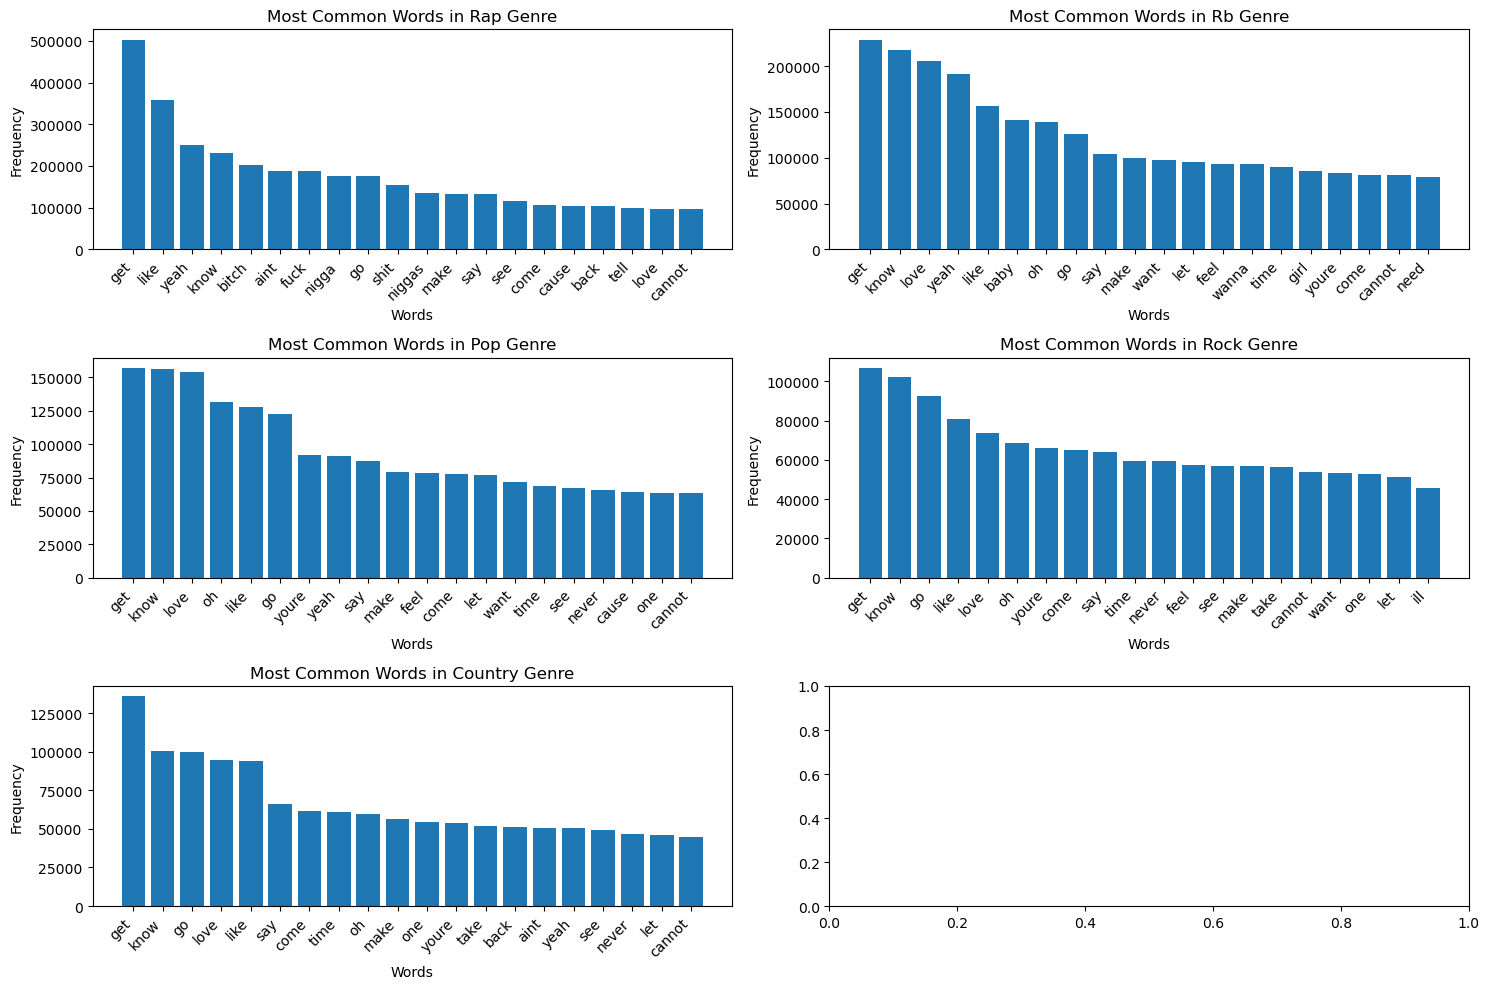

In [122]:
from itertools import chain
from collections import Counter
# Include this line to display plots inline in the notebook
%matplotlib inline

genres = ['rap', 'rb', 'pop', 'rock', 'country']

# Calculate the number of rows and columns for the subplot grid
num_rows = len(genres) // 2 + len(genres) % 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for idx, genre in enumerate(genres):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    
    genre_df = filterdf[filterdf['genre'] == genre]
    all_lines = [text.split() for text in genre_df['processed_lyrics']]
    flat_list = list(chain.from_iterable(all_lines))
    word_counts = Counter(flat_list)
    
    # Visualize word frequency (top N words)
    top_n = 20
    common_words = word_counts.most_common(top_n)
    words, counts = zip(*common_words)
    
    ax.bar(words, counts)
    ax.set_xticklabels(words, rotation=45, ha='right')
    ax.set_xlabel('Words')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Most Common Words in {genre.capitalize()} Genre')

# Adjust layout and spacing between subplots
plt.tight_layout()
plt.show()


In [2]:
filterdf = pd.read_csv('filterdf_first_step.csv')
filterdf = filterdf.dropna()
filterdf = filterdf.reset_index(drop=True)

In [82]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load your DataFrame
# Replace 'your_dataframe.csv' with your actual CSV file

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment polarity
def calculate_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores['compound']

# Apply sentiment analysis to each row and add a 'Sentiment' column
filterdf['Sentiment'] = filterdf['processed_lyrics'].apply(calculate_sentiment)

# Group by genre and calculate mean sentiment for each genre
grouped_sentiment = filterdf.groupby('genre')['Sentiment'].mean()

print(grouped_sentiment)

genre
country    0.443754
pop        0.423590
rap       -0.224863
rb         0.470551
rock       0.086154
Name: Sentiment, dtype: float64


In [83]:
filterdf['Sentiment'].mean()

0.23983947088758256

In [3]:
filterdf['year']=pd.to_datetime(filterdf['year'])
new_df = filterdf[filterdf['year'].dt.year > 2020]
new_df=new_df.reset_index(drop=True)

In [11]:
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def prepare_documents(df):
    documents = []
    for row in range(len(df)):
        words = df['processed_lyrics'][row].split(' ')
        lyrics = [text for text in words]
        document = [(lyrics),df['genre'][row]]
        documents.append(document)
    return documents

def review_documents(documents):
    random.seed(123)
    random.shuffle(documents)

    #Describe the dataset
    print('Number of Reviews/Documents: {}'.format(len(documents)))  #Corpus Size (Number of Documents)
    print('Corpus Size (words): {}'.format(np.sum([len(d) for (d,l) in documents]))) #Corpus Size (Number of Words)
    print('Sample Text of Doc 1:') #Distribution of the Two Classes
    print('-'*30)
    print(' '.join(documents[0][0][:50])) # first 50 words of the first document

    ## Check Sentiment Distribution of the Current Dataset
    from collections import Counter
    sentiment_distr = Counter([label for (words, label) in documents])
    print(sentiment_distr)
    

def split_train_test(documents):
    train, test = train_test_split(documents, test_size = 0.33, random_state=42)
    ## Sentiment Distrubtion for Train and Test
    print(Counter([label for (words, label) in train]))
    print(Counter([label for (words, label) in test]))

    X_train = [' '.join(words) for (words, label) in train]
    X_test = [' '.join(words) for (words, label) in test]
    y_train = [label for (words, label) in train]
    y_test = [label for (words, label) in test]
    
    return X_train,X_test,y_train,y_test

def vectorize_doc(X_train,X_test):
    tfidf_vec = TfidfVectorizer(min_df = 10, token_pattern = r'[a-zA-Z]+')
    X_train_bow = tfidf_vec.fit_transform(X_train) # fit train
    X_test_bow = tfidf_vec.transform(X_test) # transform test

    print(X_train_bow.shape)
    print(X_test_bow.shape)
    return X_train_bow,X_test_bow

from sklearn import svm
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
def svm_model(X_train_bow,y_train,X_test_bow,y_test):
    model_svm = svm.SVC(C=8.0, kernel='linear')
    model_svm.fit(X_train_bow, y_train)

    from sklearn.model_selection import cross_val_score
    model_svm_acc = cross_val_score(estimator=model_svm, X=X_train_bow, y=y_train, cv=5, n_jobs=-1)
    model_svm_acc
    print('Train Accuracy',model_svm_acc.mean())

    model_svm.predict(X_test_bow[:10])
    test_acc = model_svm.score(X_test_bow, y_test)
    print('Test Accuracy',test_acc)
    return model_svm,model_svm_acc,test_acc

def decision_tree_model(X_train_bow,y_train,X_test_bow,y_test):
    model_dec = DecisionTreeClassifier(max_depth=10, random_state=0)
    model_dec.fit(X_train_bow, y_train)

    model_dec_acc = cross_val_score(estimator=model_dec, X=X_train_bow, y=y_train, cv=5, n_jobs=-1)
    model_dec_acc
    print('Train Accuracy',model_dec_acc.mean())
    model_dec.predict(X_test_bow[:10])
    test_acc = model_dec.score(X_test_bow, y_test)
    print('Test Accuracy',test_acc)
    return model_dec,model_dec_acc,test_acc


from sklearn.naive_bayes import GaussianNB
def gauss_naive(X_train_bow,y_train,X_test_bow,y_test):
    model_gnb = GaussianNB()
    model_gnb.fit(X_train_bow.toarray(), y_train)

    model_gnb_acc = cross_val_score(estimator=model_gnb, X=X_train_bow.toarray(), y=y_train, cv=5, n_jobs=-1)
    print('Train Accuracy',model_gnb_acc.mean())
    model_gnb.predict(X_test_bow[:10].toarray())
    test_acc = model_dec.score(X_test_bow, y_test)
    print('Test Accuracy',test_acc)
    return model_gnb,model_gnb_acc,test_acc
    

from sklearn.linear_model import LogisticRegression

def logistic_ref(X_train_bow,y_train,X_test_bow,y_test):
    model_lg = LogisticRegression()
    model_lg.fit(X_train_bow, y_train)
    model_lg_acc = cross_val_score(estimator=model_lg, X=X_train_bow, y=y_train, cv=5, n_jobs=-1)
    print('Train Accuracy',model_lg_acc.mean())
    model_lg.predict(X_test_bow[:10].toarray())
    test_acc = model_lg.score(X_test_bow, y_test)
    print('Test Accuracy',test_acc)
    return model_lg,model_lg_acc,test_acc

def f1_and_cm(y_pred):
    f1_score_result = f1_score(y_test, y_pred, average=None, labels=np.unique(y_test))
    print("F1 Score for Each Class")
    print(f1_score_result)

    # Compute confusion matrix for model_svm and plot it
    cm_svm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix for SVM")
    print(cm_svm)
    return f1_score_result,cm_svm

In [12]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.metrics import accuracy_score


# Define column names
column_names = ['Percentage of Sample Used', 'Model', 'Train Accuracy','Test Accuracy','F1 Score','Confusion Matrix']

# Create an empty DataFrame with the defined column names
result_df = pd.DataFrame(columns=column_names)
result_df = pd.DataFrame()

for i in np.arange(0.1,1.01,0.1):
    print('Using ',i*100,'% of Sample')
    sampled_df = new_df.sample(frac=i, random_state=42)  # Adjust random_state as needed
    sampled_df = sampled_df.reset_index(drop=True)
    documents = prepare_documents(sampled_df)
    review_documents(documents)
    X_train,X_test,y_train,y_test = split_train_test(documents)
    X_train_bow,X_test_bow = vectorize_doc(X_train,X_test)
    print('---------------')
    print('SVM')
    model_svm, model_svm_acc,test_svm_acc = svm_model(X_train_bow,y_train,X_test_bow,y_test)
    y_pred = model_svm.predict(X_test_bow)
    f1_score_result,cm_svm = f1_and_cm(y_pred)
    
     # Define data to insert
    new_data = {'Percentage of Sample Used': i,'Model':'SVM', 'Train Accuracy': model_svm_acc, 'Test Accuracy': test_svm_acc,'F1 Score':f1_score_result,'Confusion Matrix':cm_svm}
    # Insert the new data into the DataFrame
    result_df = result_df.append(new_data, ignore_index=True)
    print('---------------')
    print('Decision Tree')
    model_dec,model_dec_acc,test_acc = decision_tree_model(X_train_bow,y_train,X_test_bow,y_test)
    y_pred = model_dec.predict(X_test_bow)
    f1_score_result,cm_svm = f1_and_cm(y_pred)
    # Define data to insert
    new_data1 = {'Percentage of Sample Used': i,'Model':'Decision Tree', 'Train Accuracy': model_dec_acc, 'Test Accuracy': test_acc,'F1 Score':f1_score_result,'Confusion Matrix':cm_svm}
    # Insert the new data into the DataFrame
    result_df = result_df.append(new_data1, ignore_index=True)
    print('---------------')
    print('Naive Bayes')
    model_gnb,model_gnb_acc,test_acc = gauss_naive(X_train_bow,y_train,X_test_bow,y_test)
    y_pred = model_gnb.predict(X_test_bow.toarray())
    f1_score_result,cm_svm = f1_and_cm(y_pred)
        # Define data to insert
    new_data2 = {'Percentage of Sample Used': i,'Model':'Naive Bayes', 'Train Accuracy': model_gnb_acc, 'Test Accuracy': test_acc,'F1 Score':f1_score_result,'Confusion Matrix':cm_svm}
    # Insert the new data into the DataFrame
    result_df = result_df.append(new_data2, ignore_index=True)
    
    print('Logistic Regression')
    model_lg,model_lg_acc,test_acc = logistic_ref(X_train_bow,y_train,X_test_bow,y_test)
    y_pred = model_lg.predict(X_test_bow.toarray())
    f1_score_result,cm_svm = f1_and_cm(y_pred)
        # Define data to insert
    new_data3 = {'Percentage of Sample Used': i,'Model':'Logistic Regression', 'Train Accuracy': model_lg_acc, 'Test Accuracy': test_acc,'F1 Score':f1_score_result,'Confusion Matrix':cm_svm}
    # Insert the new data into the DataFrame
    result_df = result_df.append(new_data3, ignore_index=True)
    
    print('---------------')
    print('---------------')
    print('\n')

Using  10.0 % of Sample
Number of Reviews/Documents: 2462
Corpus Size (words): 412454
Sample Text of Doc 1:
------------------------------
calm endless fire bring forth age leave pain youll see vision die give body fire true bear die go set spirit free let lifeless clear way come save pain let voice scream powerless lifelines free time cause exist survive change tide change tid blade bear anothr world slay bring everlasting
Counter({'country': 828, 'rb': 590, 'pop': 437, 'rap': 350, 'rock': 257})
Counter({'country': 569, 'rb': 385, 'pop': 282, 'rap': 247, 'rock': 166})
Counter({'country': 259, 'rb': 205, 'pop': 155, 'rap': 103, 'rock': 91})
(1649, 1832)
(813, 1832)
---------------
SVM
Train Accuracy 0.5209358017868656
Test Accuracy 0.4858548585485855
F1 Score for Each Class
[0.58318426 0.31347962 0.67368421 0.45244216 0.35502959]
Confusion Matrix for SVM
[[163  52   2  24  18]
 [ 46  50   6  39  14]
 [  8  10  64  21   0]
 [ 54  32  15  88  16]
 [ 29  20   0  12  30]]
---------------
D

/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data, ignore_index=True)


Train Accuracy 0.4408731693838077
Test Accuracy 0.4403444034440344
F1 Score for Each Class
[0.57831325 0.25142857 0.59903382 0.41690141 0.15037594]
Confusion Matrix for SVM
[[168  54   7  22   8]
 [ 63  44  10  29   9]
 [ 12   6  62  17   6]
 [ 40  61  21  74   9]
 [ 39  30   4   8  10]]
---------------
Naive Bayes
Train Accuracy 0.4390734088606429


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data1, ignore_index=True)


Test Accuracy 0.4403444034440344
F1 Score for Each Class
[0.52083333 0.26625387 0.57553957 0.29479769 0.22110553]
Confusion Matrix for SVM
[[125  52  27  24  31]
 [ 37  43  18  35  22]
 [  5   3  80  14   1]
 [ 28  53  41  51  32]
 [ 26  17   9  17  22]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data2, ignore_index=True)


Train Accuracy 0.5579276043105831
Test Accuracy 0.5264452644526445
F1 Score for Each Class
[0.64254703 0.22727273 0.67403315 0.51294118 0.20183486]
Confusion Matrix for SVM
[[222  14   2  18   3]
 [ 75  25   2  52   1]
 [ 14   3  61  25   0]
 [ 66  14  13 109   3]
 [ 55   9   0  16  11]]
---------------
---------------


Using  20.0 % of Sample
Number of Reviews/Documents: 4925
Corpus Size (words): 826829
Sample Text of Doc 1:
------------------------------
anger bear heart cannot tame bear world brand blame keep age prison call earth wear mark devil since rebirth dark eras rise youve forewarn bear world take storm unleash pit straight hell behold return youre spell raise eye pray moon open arm welcome doom rais hand hail midnight sun saint
Counter({'country': 1659, 'rb': 1174, 'pop': 880, 'rap': 723, 'rock': 489})
Counter({'country': 1085, 'rb': 802, 'pop': 604, 'rap': 476, 'rock': 332})
Counter({'country': 574, 'rb': 372, 'pop': 276, 'rap': 247, 'rock': 157})


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data3, ignore_index=True)


(3299, 2911)
(1626, 2911)
---------------
SVM
Train Accuracy 0.5116802317561043
Test Accuracy 0.5510455104551045
F1 Score for Each Class
[0.6846543  0.34129693 0.71428571 0.49662618 0.29602888]
Confusion Matrix for SVM
[[406  77   7  50  34]
 [ 77 100  10  64  25]
 [ 16  15 165  50   1]
 [ 63  76  30 184  19]
 [ 50  42   3  21  41]]
---------------
Decision Tree


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data, ignore_index=True)


Train Accuracy 0.45377523336552167
Test Accuracy 0.5018450184501845
F1 Score for Each Class
[0.63624161 0.18886199 0.65033408 0.39819005 0.21097046]
Confusion Matrix for SVM
[[474  32   4  45  19]
 [159  39   9  49  20]
 [ 31  11 146  56   3]
 [148  39  40 132  13]
 [104  16   3   9  25]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data1, ignore_index=True)


Train Accuracy 0.42042212718995725
Test Accuracy 0.5018450184501845
F1 Score for Each Class
[0.55331992 0.26506024 0.6699187  0.35857805 0.2313253 ]
Confusion Matrix for SVM
[[275 100  42  65  92]
 [ 46  77  45  48  60]
 [  7   9 206  23   2]
 [ 60  77  63 116  56]
 [ 32  42  12  23  48]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data2, ignore_index=True)


Train Accuracy 0.5707821768519795
Test Accuracy 0.6002460024600246
F1 Score for Each Class
[0.72822823 0.30042918 0.77461707 0.54182272 0.2755102 ]
Confusion Matrix for SVM
[[485  36   3  47   3]
 [108  70   8  86   4]
 [ 10   5 177  53   2]
 [ 86  46  20 217   3]
 [ 69  33   2  26  27]]
---------------
---------------


Using  30.000000000000004 % of Sample
Number of Reviews/Documents: 7387
Corpus Size (words): 1249847
Sample Text of Doc 1:
------------------------------
ooh ooh ooh ooh ooh ooh ooh ooh ooh ooh ooh ooh ooh ooh ooh ooh ooh ooh ooh ooh ooh ooh ooh ooh ooh ooh ooh ooh ooh ooh uh feel soul flow six inch gash far openness go hopin know open door ima go never come back ima
Counter({'country': 2491, 'rb': 1775, 'pop': 1289, 'rap': 1118, 'rock': 714})
Counter({'country': 1677, 'rb': 1171, 'pop': 852, 'rap': 763, 'rock': 486})
Counter({'country': 814, 'rb': 604, 'pop': 437, 'rap': 355, 'rock': 228})


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data3, ignore_index=True)


(4949, 3789)
(2438, 3789)
---------------
SVM
Train Accuracy 0.5518309485144672
Test Accuracy 0.5463494667760459
F1 Score for Each Class
[0.67350427 0.32045455 0.75       0.49348393 0.28855721]
Confusion Matrix for SVM
[[591  93   6  70  54]
 [132 141  13 117  34]
 [ 24  21 258  49   3]
 [119 123  53 284  25]
 [ 75  65   3  27  58]]
---------------
Decision Tree


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data, ignore_index=True)


Train Accuracy 0.4899939741193533
Test Accuracy 0.4831829368334701
F1 Score for Each Class
[0.59551122 0.22424242 0.65963855 0.42927632 0.16314199]
Confusion Matrix for SVM
[[597  63   7 127  20]
 [214  74  18 103  28]
 [ 35  11 219  82   8]
 [208  57  58 261  20]
 [137  18   7  39  27]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data1, ignore_index=True)


Train Accuracy 0.43685326469957414
Test Accuracy 0.4831829368334701
F1 Score for Each Class
[0.53192982 0.25828571 0.6523702  0.33541667 0.21369863]
Confusion Matrix for SVM
[[379 122  73  65 175]
 [ 89 113  58  73 104]
 [ 11  16 289  33   6]
 [ 69 139  96 161 139]
 [ 63  48  15  24  78]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data2, ignore_index=True)
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Train Accuracy 0.5983009059247684
Test Accuracy 0.588597210828548
F1 Score for Each Class
[0.71217524 0.26271186 0.78350515 0.55211726 0.25503356]
Confusion Matrix for SVM
[[699  31   4  67  13]
 [188  93  12 132  12]
 [ 30  11 266  48   0]
 [133  84  41 339   7]
 [ 99  52   1  38  38]]
---------------
---------------


Using  40.0 % of Sample


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data3, ignore_index=True)


Number of Reviews/Documents: 9850
Corpus Size (words): 1663943
Sample Text of Doc 1:
------------------------------
three raven tree derry three raven tree hi ho middlemost raven say lie dead man yon tree derry hi ho come lady full woe derry come lady full woe hi ho come lady full woe come lady may go derry hi ho whos thats kill true love derry whos thats
Counter({'country': 3287, 'rb': 2409, 'pop': 1678, 'rap': 1506, 'rock': 970})
Counter({'country': 2189, 'rb': 1621, 'pop': 1097, 'rap': 1040, 'rock': 652})
Counter({'country': 1098, 'rb': 788, 'pop': 581, 'rap': 466, 'rock': 318})
(6599, 4593)
(3251, 4593)
---------------
SVM
Train Accuracy 0.5675082132928987
Test Accuracy 0.5592125499846201
F1 Score for Each Class
[0.68122638 0.31924883 0.75136911 0.51446945 0.31972789]
Confusion Matrix for SVM
[[811  90  11 107  79]
 [199 170  19 147  46]
 [ 24  24 343  64  11]
 [148 132  68 400  40]
 [101  68   6  49  94]]
---------------
Decision Tree


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data, ignore_index=True)


Train Accuracy 0.49295414340524274
Test Accuracy 0.48846508766533375
F1 Score for Each Class
[0.61610018 0.15862069 0.66743383 0.43586387 0.15909091]
Confusion Matrix for SVM
[[861  83  11 120  23]
 [320  69  12 149  31]
 [ 40  26 290  97  13]
 [271  82  82 333  20]
 [205  29   8  41  35]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data1, ignore_index=True)


Train Accuracy 0.42476152732786543
Test Accuracy 0.48846508766533375
F1 Score for Each Class
[0.5399361  0.29020979 0.64122137 0.32231405 0.21264895]
Confusion Matrix for SVM
[[507 159  90  59 283]
 [ 87 166  74  84 170]
 [ 14  20 378  48   6]
 [ 94 161 140 195 198]
 [ 78  57  31  36 116]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data2, ignore_index=True)
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Train Accuracy 0.611907666505847
Test Accuracy 0.605659796985543
F1 Score for Each Class
[0.71584699 0.28865979 0.77680525 0.58432304 0.33688699]
Confusion Matrix for SVM
[[917  42  10 104  25]
 [245 126  13 175  22]
 [ 28  10 355  66   7]
 [146  66  66 492  18]
 [128  48   4  59  79]]
---------------
---------------


Using  50.0 % of Sample
Number of Reviews/Documents: 12312
Corpus Size (words): 2078329
Sample Text of Doc 1:
------------------------------
first impressions rep everything true color shine rise underneath truth come burn desire within break tambourine hit road bag pack look fear eye say id never make boy watch try go alone break tambourine ive learn life get push road ive see past see better days imperfections become save grace
Counter({'country': 4148, 'rb': 2991, 'pop': 2085, 'rap': 1863, 'rock': 1225})
Counter({'country': 2784, 'rb': 2007, 'pop': 1392, 'rap': 1245, 'rock': 821})
Counter({'country': 1364, 'rb': 984, 'pop': 693, 'rap': 618, 'rock': 404})
(8249, 5249)


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data, ignore_index=True)


Train Accuracy 0.49290890714298835
Test Accuracy 0.48658626630568547
F1 Score for Each Class
[0.61184019 0.17574021 0.67802691 0.41449719 0.18055556]
Confusion Matrix for SVM
[[1049   93   15  177   30]
 [ 351   92   12  191   47]
 [  44   32  378  147   17]
 [ 364  104   84  406   26]
 [ 257   33    8   54   52]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data1, ignore_index=True)


Train Accuracy 0.42841670801403975
Test Accuracy 0.48658626630568547
F1 Score for Each Class
[0.53345148 0.26435986 0.66258503 0.3099932  0.23331086]
Confusion Matrix for SVM
[[602 201  97  65 399]
 [105 191  76  88 233]
 [ 17  25 487  74  15]
 [ 93 254 150 228 259]
 [ 76  81  42  32 173]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data2, ignore_index=True)
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Train Accuracy 0.6193499090357792
Test Accuracy 0.6222003445729757
F1 Score for Each Class
[0.7291866  0.34608696 0.79381443 0.59531773 0.34589041]
Confusion Matrix for SVM
[[1143   67   11  121   22]
 [ 238  199   18  208   30]
 [  39   17  462   94    6]
 [ 190   98   52  623   21]
 [ 161   76    3   63  101]]
---------------
---------------


Using  60.00000000000001 % of Sample
Number of Reviews/Documents: 14774
Corpus Size (words): 2495321
Sample Text of Doc 1:
------------------------------
know whats know us yeah want go baby get know whats want go know us yeah gonna make way watch gonna hustle everyday oohwoah make paper like origami come win game cannot stop yeah want go baby get want go baby ooooown ooooown ooooown yeah know whats know us yeah
Counter({'country': 4988, 'rb': 3597, 'pop': 2505, 'rap': 2210, 'rock': 1474})
Counter({'country': 3318, 'rb': 2384, 'pop': 1714, 'rap': 1489, 'rock': 993})
Counter({'country': 1670, 'rb': 1213, 'pop': 791, 'rap': 721, 'rock': 481})
(98

/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data, ignore_index=True)


Train Accuracy 0.491209569163081
Test Accuracy 0.49343724364232977
F1 Score for Each Class
[0.62558083 0.22782985 0.66666667 0.42434489 0.05745063]
Confusion Matrix for SVM
[[1279  130   11  227   23]
 [ 390  158   25  202   16]
 [  54   53  451  157    6]
 [ 394  169  133  502   15]
 [ 302   86   12   65   16]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data1, ignore_index=True)


Train Accuracy 0.41523542652395606
Test Accuracy 0.49343724364232977
F1 Score for Each Class
[0.52748063 0.26344411 0.65581134 0.3082153  0.23043478]
Confusion Matrix for SVM
[[715 240 129  85 501]
 [ 97 218  98  88 290]
 [ 25  28 584  71  13]
 [112 282 204 272 343]
 [ 92  96  45  36 212]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data2, ignore_index=True)
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Train Accuracy 0.6191154598026756
Test Accuracy 0.6269483182936834
F1 Score for Each Class
[0.73569915 0.33928571 0.77810219 0.61102362 0.36288089]
Confusion Matrix for SVM
[[1389   96   12  139   34]
 [ 281  228   18  225   39]
 [  39   24  533  114   11]
 [ 217  112   82  776   26]
 [ 180   93    4   73  131]]
---------------
---------------


Using  70.0 % of Sample


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data3, ignore_index=True)


Number of Reviews/Documents: 17237
Corpus Size (words): 2913302
Sample Text of Doc 1:
------------------------------
every cowboy rid break black mustang sometimes twotank twotone shortbed chevrolet every cowboy drink whiskey like water man shake daddys hand right daughter love aint heartbreak country song girl bet mama warn bout guy like outlaw blood aint wildcard sleeve cause aint silhouette stetson head west red sunset take heart
Counter({'country': 5806, 'rb': 4221, 'pop': 2930, 'rap': 2582, 'rock': 1698})
Counter({'country': 3876, 'rb': 2798, 'pop': 1987, 'rap': 1776, 'rock': 1111})
Counter({'country': 1930, 'rb': 1423, 'pop': 943, 'rap': 806, 'rock': 587})
(11548, 6430)
(5689, 6430)
---------------
SVM
Train Accuracy 0.5736934524981299
Test Accuracy 0.5703990156442257
F1 Score for Each Class
[0.69348939 0.32885212 0.75546976 0.54132082 0.33005894]
Confusion Matrix for SVM
[[1422  209   14  173  112]
 [ 286  318   21  234   84]
 [  42   48  587  112   17]
 [ 255  261  107  750   5

/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data, ignore_index=True)


Train Accuracy 0.4993943518586221
Test Accuracy 0.4895412198980489
F1 Score for Each Class
[0.63009404 0.22779043 0.66937669 0.39308309 0.05067064]
Confusion Matrix for SVM
[[1608  175   12  114   21]
 [ 526  200   25  171   21]
 [  93   68  494  145    6]
 [ 568  249  121  466   19]
 [ 379  121   18   52   17]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data1, ignore_index=True)


Train Accuracy 0.4221516032689701
Test Accuracy 0.4895412198980489
F1 Score for Each Class
[0.54043887 0.25746653 0.67156348 0.33613445 0.23566879]
Confusion Matrix for SVM
[[862 263 118 103 584]
 [120 250 101 120 352]
 [ 34  29 640  89  14]
 [133 331 197 360 402]
 [111 126  44  47 259]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data2, ignore_index=True)
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Train Accuracy 0.6210605966864087
Test Accuracy 0.6259448057655124
F1 Score for Each Class
[0.73940487 0.33395639 0.79051383 0.61616503 0.32946636]
Confusion Matrix for SVM
[[1640  103    8  133   46]
 [ 332  268   18  274   51]
 [  44   33  600  116   13]
 [ 261  154   74  911   23]
 [ 229  104   12  100  142]]
---------------
---------------


Using  80.0 % of Sample


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data3, ignore_index=True)


Number of Reviews/Documents: 19699
Corpus Size (words): 3348150
Sample Text of Doc 1:
------------------------------
hear sleigh bell jingle ringtingtingling come lovely weather sleigh ride together outside snow fall friends call yoo hoo come lovely weather sleigh ride together giddy yap giddy yap giddy yap let go let look show rid wonderland snow giddy yap giddy yap giddy yap grand hold hand rid along song
Counter({'country': 6598, 'rb': 4833, 'pop': 3345, 'rap': 2974, 'rock': 1949})
Counter({'country': 4486, 'rb': 3196, 'pop': 2238, 'rap': 1956, 'rock': 1322})
Counter({'country': 2112, 'rb': 1637, 'pop': 1107, 'rap': 1018, 'rock': 627})
(13198, 6974)
(6501, 6974)
---------------
SVM
Train Accuracy 0.58554273312894
Test Accuracy 0.5768343331795108
F1 Score for Each Class
[0.68654738 0.34225092 0.77244898 0.54278576 0.34759825]
Confusion Matrix for SVM
[[1554  217   23  180  138]
 [ 322  371   32  287   95]
 [  48   62  757  133   18]
 [ 295  283  122  869   68]
 [ 196  128    8   96  

/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data, ignore_index=True)


Train Accuracy 0.5060612376129617
Test Accuracy 0.4925396092908783
F1 Score for Each Class
[0.61626248 0.12820513 0.67686035 0.42983565 0.08905852]
Confusion Matrix for SVM
[[1728   62   48  246   28]
 [ 625   95   36  313   38]
 [  79   40  664  213   22]
 [ 623  118  180  680   36]
 [ 441   60   16   75   35]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data1, ignore_index=True)


Train Accuracy 0.41862456509008233
Test Accuracy 0.4925396092908783
F1 Score for Each Class
[0.50369932 0.27517986 0.69294067 0.32425843 0.24191708]
Confusion Matrix for SVM
[[851 284 135 125 717]
 [122 306  98 142 439]
 [ 36  43 800 114  25]
 [146 374 215 399 503]
 [112 110  43  44 318]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data2, ignore_index=True)
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Train Accuracy 0.6300949338018305
Test Accuracy 0.6251345946777419
F1 Score for Each Class
[0.72870794 0.35206787 0.80123267 0.59935046 0.37809917]
Confusion Matrix for SVM
[[1754  112   17  172   57]
 [ 367  332   28  332   48]
 [  52   40  780  133   13]
 [ 302  186   94 1015   40]
 [ 227  109   10   98  183]]
---------------
---------------


Using  90.0 % of Sample


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data3, ignore_index=True)


Number of Reviews/Documents: 22162
Corpus Size (words): 3769210
Sample Text of Doc 1:
------------------------------
bed feel bigger use people sleep admit theyre wrong common grind something refuse find way say like use lie awake wonder love go theyre say things theyre use foreign phrase theyre feel things theyre speak different languags lose translation love lose translation lose translation love lose translation hes work hs
Counter({'country': 7349, 'rb': 5474, 'pop': 3803, 'rap': 3320, 'rock': 2216})
Counter({'country': 4937, 'rb': 3672, 'pop': 2555, 'rap': 2183, 'rock': 1501})
Counter({'country': 2412, 'rb': 1802, 'pop': 1248, 'rap': 1137, 'rock': 715})
(14848, 7560)
(7314, 7560)
---------------
SVM
Train Accuracy 0.5806847412034344
Test Accuracy 0.589280831282472
F1 Score for Each Class
[0.70092538 0.38785047 0.76780759 0.55489362 0.34621329]
Confusion Matrix for SVM
[[1780  252   23  205  152]
 [ 325  498   26  292  107]
 [  57   70  830  154   26]
 [ 307  309  138  978   70]
 [

/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data, ignore_index=True)


Train Accuracy 0.4983827270118951
Test Accuracy 0.5083401695378725
F1 Score for Each Class
[0.62806099 0.08499336 0.68246914 0.4655411  0.16750757]
Confusion Matrix for SVM
[[2039   53   26  271   23]
 [ 716   64   33  352   83]
 [ 133   27  691  256   30]
 [ 693   81  130  841   57]
 [ 500   33    8   91   83]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data1, ignore_index=True)


Train Accuracy 0.41439981945876186
Test Accuracy 0.5083401695378725
F1 Score for Each Class
[0.51176163 0.2687747  0.67677946 0.31324405 0.24958513]
Confusion Matrix for SVM
[[979 350 154 127 802]
 [133 340 108 147 520]
 [ 30  53 870 148  36]
 [150 419 248 421 564]
 [122 120  54  43 376]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data2, ignore_index=True)
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Train Accuracy 0.626213090827439
Test Accuracy 0.6363139185124419
F1 Score for Each Class
[0.73971079 0.38628159 0.79943636 0.62118019 0.36779506]
Confusion Matrix for SVM
[[1995  154   10  189   64]
 [ 387  428   19  351   63]
 [  69   37  851  162   18]
 [ 303  184  104 1179   32]
 [ 228  165    8  113  201]]
---------------
---------------


Using  100.0 % of Sample


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data3, ignore_index=True)


Number of Reviews/Documents: 24624
Corpus Size (words): 4184226
Sample Text of Doc 1:
------------------------------
iboooooo nangu su sa naira aa seh nigeria wo jamaica africa continental busiswa de de mo ti wa e ti pe mo fe de de de je kin de de de busiswa de de mo ti wa e ti pe mo fe de de de yo rexxie pon one je
Counter({'country': 8173, 'rb': 6081, 'pop': 4235, 'rap': 3657, 'rock': 2478})
Counter({'country': 5487, 'rb': 4067, 'pop': 2848, 'rap': 2451, 'rock': 1645})
Counter({'country': 2686, 'rb': 2014, 'pop': 1387, 'rap': 1206, 'rock': 833})
(16498, 8094)
(8126, 8094)
---------------
SVM
Train Accuracy 0.586132363342427
Test Accuracy 0.5892197883337436
F1 Score for Each Class
[0.71351539 0.36217598 0.7623201  0.54902949 0.36968085]
Confusion Matrix for SVM
[[2051  245   27  211  152]
 [ 370  496   31  366  124]
 [  56   72  874  184   20]
 [ 343  342  143 1089   97]
 [ 243  197   12  103  278]]
---------------
Decision Tree


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data, ignore_index=True)


Train Accuracy 0.5018789532181469
Test Accuracy 0.5120600541471819
F1 Score for Each Class
[0.62802601 0.11117545 0.69261745 0.47946561 0.10206084]
Confusion Matrix for SVM
[[2270   47   23  313   33]
 [ 814   96   37  392   48]
 [ 112   55  774  238   27]
 [ 747   87  185  969   26]
 [ 600   55   10  116   52]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data1, ignore_index=True)


Train Accuracy 0.4104734768111549
Test Accuracy 0.5120600541471819
F1 Score for Each Class
[0.50257611 0.23961063 0.67751265 0.29784367 0.24657534]
Confusion Matrix for SVM
[[1073  314  168  141  990]
 [ 158  320  130  177  602]
 [  49   53  937  139   28]
 [ 164  456  269  442  683]
 [ 140  141   56   55  441]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data2, ignore_index=True)
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Train Accuracy 0.6258931907740637
Test Accuracy 0.633275904504061
F1 Score for Each Class
[0.74119197 0.37137014 0.79542455 0.61197979 0.40675365]
Confusion Matrix for SVM
[[2251  164   20  194   57]
 [ 425  454   29  391   88]
 [  57   40  904  189   16]
 [ 359  233  106 1272   44]
 [ 296  167    8   97  265]]
---------------
---------------




/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/3530964615.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data3, ignore_index=True)


In [13]:
result_df

,Percentage of Sample Used,Model,Train Accuracy,Test Accuracy,F1 Score,Confusion Matrix
0,0.1,SVM,"[0.5121212121212121, 0.5151515151515151, 0.512...",0.485855,"[0.5831842576028623, 0.3134796238244514, 0.673...","[[163, 52, 2, 24, 18], [46, 50, 6, 39, 14], [8..."
1,0.1,Decision Tree,"[0.43636363636363634, 0.4393939393939394, 0.41...",0.440344,"[0.5783132530120482, 0.2514285714285714, 0.599...","[[168, 54, 7, 22, 8], [63, 44, 10, 29, 9], [12..."
2,0.1,Naive Bayes,"[0.45454545454545453, 0.42424242424242425, 0.4...",0.440344,"[0.5208333333333333, 0.26625386996904027, 0.57...","[[125, 52, 27, 24, 31], [37, 43, 18, 35, 22], ..."
3,0.1,Logistic Regression,"[0.5454545454545454, 0.5393939393939394, 0.569...",0.526445,"[0.642547033285094, 0.22727272727272727, 0.674...","[[222, 14, 2, 18, 3], [75, 25, 2, 52, 1], [14,..."
4,0.2,SVM,"[0.4909090909090909, 0.4818181818181818, 0.534...",0.551046,"[0.6846543001686339, 0.341296928327645, 0.7142...","[[406, 77, 7, 50, 34], [77, 100, 10, 64, 25], ..."
5,0.2,Decision Tree,"[0.45454545454545453, 0.41363636363636364, 0.4...",0.501845,"[0.636241610738255, 0.18886198547215496, 0.650...","[[474, 32, 4, 45, 19], [159, 39, 9, 49, 20], [..."
6,0.2,Naive Bayes,"[0.403030303030303, 0.4348484848484849, 0.4318...",0.501845,"[0.5533199195171026, 0.2650602409638554, 0.669...","[[275, 100, 42, 65, 92], [46, 77, 45, 48, 60],..."
7,0.2,Logistic Regression,"[0.55, 0.543939393939394, 0.5863636363636363, ...",0.600246,"[0.7282282282282282, 0.3004291845493562, 0.774...","[[485, 36, 3, 47, 3], [108, 70, 8, 86, 4], [10..."
8,0.3,SVM,"[0.5393939393939394, 0.5585858585858586, 0.557...",0.546349,"[0.6735042735042736, 0.32045454545454544, 0.75...","[[591, 93, 6, 70, 54], [132, 141, 13, 117, 34]..."
9,0.3,Decision Tree,"[0.49393939393939396, 0.48484848484848486, 0.4...",0.483183,"[0.5955112219451372, 0.22424242424242427, 0.65...","[[597, 63, 7, 127, 20], [214, 74, 18, 103, 28]..."


In [14]:
pivot_result_df = pd.pivot(result_df, index='Model', columns='Percentage of Sample Used', values='Test Accuracy')

In [27]:
pivot_result_df

Percentage of Sample Used,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
Model,,,,,,,,,,
Decision Tree,0.440344,0.501845,0.483183,0.488465,0.486586,0.493437,0.489541,0.492540,0.508340,0.512060
Logistic Regression,0.526445,0.600246,0.588597,0.605660,0.622200,0.626948,0.625945,0.625135,0.636314,0.633276
Naive Bayes,0.440344,0.501845,0.483183,0.488465,0.486586,0.493437,0.489541,0.492540,0.508340,0.512060
SVM,0.485855,0.551046,0.546349,0.559213,0.576175,0.565012,0.570399,0.576834,0.589281,0.589220


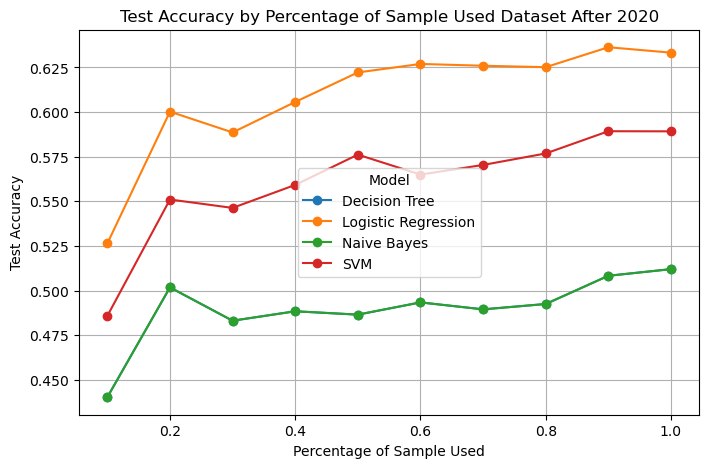

In [31]:
pivot_result_df.T.plot(style='-', marker='o', figsize=(8, 5))
plt.xlabel('Percentage of Sample Used')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy by Percentage of Sample Used Dataset After 2020')
plt.legend(title='Model')
plt.grid()
plt.show()

## From 2018 to 2020

In [35]:
filterdf['year']=pd.to_datetime(filterdf['year'])
new_df1 = filterdf[(filterdf['year'].dt.year > 2017) & (filterdf['year'].dt.year < 2021)]
new_df1=new_df1.reset_index(drop=True)

In [38]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.metrics import accuracy_score


# Define column names
column_names = ['Percentage of Sample Used', 'Model', 'Train Accuracy','Test Accuracy','F1 Score','Confusion Matrix']

# Create an empty DataFrame with the defined column names
result_df = pd.DataFrame(columns=column_names)
result_df = pd.DataFrame()

for i in np.arange(0.1,1.01,0.1):
    print('Using ',i*100,'% of Sample')
    sampled_df = new_df1.sample(frac=i, random_state=42)  # Adjust random_state as needed
    sampled_df = sampled_df.reset_index(drop=True)
    documents = prepare_documents(sampled_df)
    review_documents(documents)
    X_train,X_test,y_train,y_test = split_train_test(documents)
    X_train_bow,X_test_bow = vectorize_doc(X_train,X_test)
    print('---------------')
    print('SVM')
    model_svm, model_svm_acc,test_svm_acc = svm_model(X_train_bow,y_train,X_test_bow,y_test)
    y_pred = model_svm.predict(X_test_bow)
    f1_score_result,cm_svm = f1_and_cm(y_pred)
    
     # Define data to insert
    new_data = {'Percentage of Sample Used': i,'Model':'SVM', 'Train Accuracy': model_svm_acc, 'Test Accuracy': test_svm_acc,'F1 Score':f1_score_result,'Confusion Matrix':cm_svm}
    # Insert the new data into the DataFrame
    result_df = result_df.append(new_data, ignore_index=True)
    print('---------------')
    print('Decision Tree')
    model_dec,model_dec_acc,test_acc = decision_tree_model(X_train_bow,y_train,X_test_bow,y_test)
    y_pred = model_dec.predict(X_test_bow)
    f1_score_result,cm_svm = f1_and_cm(y_pred)
    # Define data to insert
    new_data1 = {'Percentage of Sample Used': i,'Model':'Decision Tree', 'Train Accuracy': model_dec_acc, 'Test Accuracy': test_acc,'F1 Score':f1_score_result,'Confusion Matrix':cm_svm}
    # Insert the new data into the DataFrame
    result_df = result_df.append(new_data1, ignore_index=True)
    print('---------------')
    print('Naive Bayes')
    model_gnb,model_gnb_acc,test_acc = gauss_naive(X_train_bow,y_train,X_test_bow,y_test)
    y_pred = model_gnb.predict(X_test_bow.toarray())
    f1_score_result,cm_svm = f1_and_cm(y_pred)
        # Define data to insert
    new_data2 = {'Percentage of Sample Used': i,'Model':'Naive Bayes', 'Train Accuracy': model_gnb_acc, 'Test Accuracy': test_acc,'F1 Score':f1_score_result,'Confusion Matrix':cm_svm}
    # Insert the new data into the DataFrame
    result_df = result_df.append(new_data2, ignore_index=True)
    
    print('Logistic Regression')
    model_lg,model_lg_acc,test_acc = logistic_ref(X_train_bow,y_train,X_test_bow,y_test)
    y_pred = model_lg.predict(X_test_bow.toarray())
    f1_score_result,cm_svm = f1_and_cm(y_pred)
        # Define data to insert
    new_data3 = {'Percentage of Sample Used': i,'Model':'Logistic Regression', 'Train Accuracy': model_lg_acc, 'Test Accuracy': test_acc,'F1 Score':f1_score_result,'Confusion Matrix':cm_svm}
    # Insert the new data into the DataFrame
    result_df = result_df.append(new_data3, ignore_index=True)
    
    print('---------------')
    print('---------------')
    print('\n')

Using  10.0 % of Sample
Number of Reviews/Documents: 3190
Corpus Size (words): 560364
Sample Text of Doc 1:
------------------------------
go break like know would try fake like mean good like little heart inside chest youll always whatever serve best hes older think blind memories picture mind love care sometimes flicker like ghost go go get hair go go even care maybe youll come around change ways fog youre live
Counter({'rb': 849, 'rap': 670, 'pop': 666, 'country': 568, 'rock': 437})
Counter({'rb': 557, 'rap': 460, 'pop': 439, 'country': 400, 'rock': 281})
Counter({'rb': 292, 'pop': 227, 'rap': 210, 'country': 168, 'rock': 156})
(2137, 2212)
(1053, 2212)
---------------
SVM
Train Accuracy 0.4524885639869553
Test Accuracy 0.46438746438746437
F1 Score for Each Class
[0.43950617 0.36400818 0.71898734 0.4635514  0.31914894]
Confusion Matrix for SVM
[[ 89  31  11  20  17]
 [ 45  89   9  45  39]
 [ 14  19 142  33   2]
 [ 47  80  18 124  23]
 [ 42  43   5  21  45]]
---------------
Decision 

/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data, ignore_index=True)


Train Accuracy 0.38371489855326224
Test Accuracy 0.4007597340930674
F1 Score for Each Class
[0.2        0.36111111 0.66341463 0.44262295 0.08988764]
Confusion Matrix for SVM
[[ 26  89   6  43   4]
 [ 21 117  17  69   3]
 [ 11  17 136  44   2]
 [ 15 102  35 135   5]
 [ 19  96   6  27   8]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data1, ignore_index=True)


Train Accuracy 0.3921545667447307
Test Accuracy 0.4007597340930674
F1 Score for Each Class
[0.34090909 0.24685139 0.64272212 0.3030303  0.27322404]
Confusion Matrix for SVM
[[ 60  25  30  15  38]
 [ 44  49  30  40  64]
 [  4   7 170  25   4]
 [ 45  58  65  70  54]
 [ 31  31  24  20  50]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data2, ignore_index=True)


Train Accuracy 0.5123979513668497
Test Accuracy 0.5194681861348528
F1 Score for Each Class
[0.50402145 0.35920177 0.76262626 0.56074766 0.33606557]
Confusion Matrix for SVM
[[ 94  27   8  28  11]
 [ 39  81   9  78  20]
 [  9  12 151  35   3]
 [ 21  63  15 180  13]
 [ 42  41   3  29  41]]
---------------
---------------


Using  20.0 % of Sample
Number of Reviews/Documents: 6380
Corpus Size (words): 1119704
Sample Text of Doc 1:
------------------------------
street midnight ocean rock roll mermaids sleep lawyers creep bankers sell souls slide silent darkness wait light world decay search ways make night nevermore nevermore say nevermore say nevermore wait whistle lie track lie wed see phosphor screen well come flood back could wait forever horror cold learn feel deadly
Counter({'rb': 1636, 'pop': 1385, 'rap': 1310, 'country': 1158, 'rock': 891})
Counter({'rb': 1063, 'pop': 928, 'rap': 898, 'country': 783, 'rock': 602})
Counter({'rb': 573, 'pop': 457, 'rap': 412, 'country': 375, 'rock':

/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data3, ignore_index=True)


(4274, 3496)
(2106, 3496)
---------------
SVM
Train Accuracy 0.47052028979552707
Test Accuracy 0.47293447293447294
F1 Score for Each Class
[0.43821656 0.3654224  0.715      0.46660567 0.37596899]
Confusion Matrix for SVM
[[172 100   8  54  41]
 [ 87 186  20 113  51]
 [ 17  41 286  62   6]
 [ 75 148  63 255  32]
 [ 59  86  11  36  97]]
---------------
Decision Tree


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data, ignore_index=True)


Train Accuracy 0.41624197104783817
Test Accuracy 0.4154795821462488
F1 Score for Each Class
[0.30067568 0.40319361 0.67651007 0.40116845 0.14492754]
Confusion Matrix for SVM
[[ 89 215   5  57   9]
 [ 35 303  11  92  16]
 [ 31  50 252  78   1]
 [ 44 260  58 206   5]
 [ 18 218   7  21  25]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data1, ignore_index=True)


Train Accuracy 0.3951800265691551
Test Accuracy 0.4154795821462488
F1 Score for Each Class
[0.36793693 0.19884726 0.66859903 0.32810615 0.31354983]
Confusion Matrix for SVM
[[140  36  54  24 121]
 [ 89  69  63  47 189]
 [ 15  17 346  29   5]
 [ 93  79 116 136 149]
 [ 49  36  44  20 140]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data2, ignore_index=True)


Train Accuracy 0.5336957146965775
Test Accuracy 0.5389363722697056
F1 Score for Each Class
[0.5188172  0.41158221 0.7715736  0.5513245  0.41980198]
Confusion Matrix for SVM
[[193  84   4  59  35]
 [ 67 199  12 139  40]
 [ 13  23 304  67   5]
 [ 45 115  50 333  30]
 [ 51  89   6  37 106]]
---------------
---------------


Using  30.000000000000004 % of Sample


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data3, ignore_index=True)


Number of Reviews/Documents: 9569
Corpus Size (words): 1682474
Sample Text of Doc 1:
------------------------------
wake morning start day first thing go god pray talk know handle ask many things cause theres nothing smell give hope need today give faith ive lose way give strength place need give love give joy give peace god forgive slip away know things cause know perfect never long hand
Counter({'rb': 2441, 'pop': 2077, 'rap': 1990, 'country': 1755, 'rock': 1306})
Counter({'rb': 1621, 'pop': 1395, 'rap': 1339, 'country': 1213, 'rock': 843})
Counter({'rb': 820, 'pop': 682, 'rap': 651, 'country': 542, 'rock': 463})
(6411, 4542)
(3158, 4542)
---------------
SVM
Train Accuracy 0.4968027840365369
Test Accuracy 0.48860037998733374
F1 Score for Each Class
[0.49655172 0.35534377 0.71860095 0.48689139 0.36759371]
Confusion Matrix for SVM
[[288 114  20  56  64]
 [123 261  31 183  84]
 [ 33  58 452  89  19]
 [ 85 208  92 390  45]
 [ 89 146  12  64 152]]
---------------
Decision Tree


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data, ignore_index=True)


Train Accuracy 0.4353467825384878
Test Accuracy 0.435085497150095
F1 Score for Each Class
[0.34506243 0.4289746  0.69344262 0.41134752 0.08921933]
Confusion Matrix for SVM
[[152 276  16  84  14]
 [ 46 456  18 146  16]
 [ 23  65 423 134   6]
 [ 78 305 103 319  15]
 [ 40 342   9  48  24]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data1, ignore_index=True)


Train Accuracy 0.3882389777274645
Test Accuracy 0.435085497150095
F1 Score for Each Class
[0.35854342 0.22264875 0.68787276 0.32760033 0.37202987]
Confusion Matrix for SVM
[[192  51  66  39 194]
 [108 116  87  69 302]
 [ 28  16 519  68  20]
 [124 136 140 200 220]
 [ 77  41  46  25 274]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data2, ignore_index=True)
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Train Accuracy 0.5414130298649202
Test Accuracy 0.5490816972767575
F1 Score for Each Class
[0.57293497 0.4017094  0.77096774 0.55062571 0.42268041]
Confusion Matrix for SVM
[[326  99  12  64  41]
 [100 282  20 215  65]
 [ 24  27 478 106  16]
 [ 62 176  71 484  27]
 [ 84 138   8  69 164]]
---------------
---------------


Using  40.0 % of Sample
Number of Reviews/Documents: 12759
Corpus Size (words): 2230181
Sample Text of Doc 1:
------------------------------
season pass wouldnt wait theyre star outside window crack swim inside shadow cast wouldnt wait didnt find way live inside fall rise bend break burn survive forget go settle forget go bed tuck finger away season lose run hide go well run dry season know fall rise bend break burn
Counter({'rb': 3268, 'pop': 2750, 'rap': 2610, 'country': 2383, 'rock': 1748})
Counter({'rb': 2170, 'pop': 1847, 'rap': 1765, 'country': 1570, 'rock': 1196})
Counter({'rb': 1098, 'pop': 903, 'rap': 845, 'country': 813, 'rock': 552})
(8548, 5359)
(4211, 5359

/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data, ignore_index=True)


Train Accuracy 0.4330833324778691
Test Accuracy 0.43528853004037044
F1 Score for Each Class
[0.36776557 0.39969313 0.70072115 0.40800763 0.14534884]
Confusion Matrix for SVM
[[251 378  21 142  21]
 [ 77 521  53 223  29]
 [ 25  65 583 159  13]
 [126 374 147 428  23]
 [ 73 366  15  48  50]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data1, ignore_index=True)


Train Accuracy 0.3897991027891554
Test Accuracy 0.43528853004037044
F1 Score for Each Class
[0.39187418 0.20073801 0.65894207 0.31618103 0.3108595 ]
Confusion Matrix for SVM
[[299  60 110  42 302]
 [136 136 126  91 414]
 [ 32  38 654  96  25]
 [179 134 182 255 348]
 [ 67  84  68  31 302]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data2, ignore_index=True)
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Train Accuracy 0.5567393126858496
Test Accuracy 0.5578247447162195
F1 Score for Each Class
[0.61547988 0.39450549 0.77657005 0.54584589 0.42857143]
Confusion Matrix for SVM
[[497 118  11 108  79]
 [120 359  39 288  97]
 [ 20  43 643 125  14]
 [ 79 235 100 634  50]
 [ 86 162  18  70 216]]
---------------
---------------


Using  50.0 % of Sample


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data3, ignore_index=True)


Number of Reviews/Documents: 15949
Corpus Size (words): 2790280
Sample Text of Doc 1:
------------------------------
verse rain frustrate impatient cannot get admit different tell get something cannot understand understand get different plan tell chorus get philosophies get philosophies get mind make mind make want love love youre stick philosophies want free want free get mind verse texting swear flex dyslexic flip word act like hurt
Counter({'rb': 4137, 'pop': 3458, 'rap': 3242, 'country': 2949, 'rock': 2163})
Counter({'rb': 2750, 'pop': 2312, 'rap': 2206, 'country': 1987, 'rock': 1430})
Counter({'rb': 1387, 'pop': 1146, 'rap': 1036, 'country': 962, 'rock': 733})
(10685, 6102)
(5264, 6102)
---------------
SVM
Train Accuracy 0.5036031820308844
Test Accuracy 0.5237462006079028
F1 Score for Each Class
[0.54716981 0.39052763 0.75170399 0.52192982 0.37965072]
Confusion Matrix for SVM
[[551 156  34 130  91]
 [191 470  53 295 137]
 [ 37  81 772 122  24]
 [129 333 129 714  82]
 [144 221  30 

/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data, ignore_index=True)


Train Accuracy 0.4325690219934487
Test Accuracy 0.4405395136778115
F1 Score for Each Class
[0.34699104 0.40774963 0.70547264 0.43274854 0.14566474]
Confusion Matrix for SVM
[[271 428  25 208  30]
 [112 684  49 283  18]
 [ 34 105 709 185   3]
 [107 508 162 592  18]
 [ 76 484  29  81  63]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data1, ignore_index=True)


Train Accuracy 0.38961160505381376
Test Accuracy 0.4405395136778115
F1 Score for Each Class
[0.39398652 0.19081272 0.6751269  0.28628629 0.31823553]
Confusion Matrix for SVM
[[380  70  98  53 361]
 [199 162 128 113 544]
 [ 29  46 798 112  51]
 [243 188 224 286 446]
 [116  86  80  47 404]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data2, ignore_index=True)
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Train Accuracy 0.5546092653252223
Test Accuracy 0.5626899696048632
F1 Score for Each Class
[0.59178367 0.41296928 0.78303267 0.56303382 0.4395947 ]
Confusion Matrix for SVM
[[569 157  23 142  71]
 [148 484  46 350 118]
 [ 28  57 803 132  16]
 [ 86 292 122 824  63]
 [130 208  21  92 282]]
---------------
---------------


Using  60.00000000000001 % of Sample


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data3, ignore_index=True)


Number of Reviews/Documents: 19139
Corpus Size (words): 3350429
Sample Text of Doc 1:
------------------------------
wanna grow old die wanna make baby til say youre go bed wake tell turn tvs aint nothin new wanna wake every day best clockmaker mar days hate everything love hold mirror show love understand make sense world see gonna wake every day best clockmaker mar wanna grow old die
Counter({'rb': 4972, 'pop': 4148, 'rap': 3904, 'country': 3520, 'rock': 2595})
Counter({'rb': 3368, 'pop': 2768, 'rap': 2591, 'country': 2361, 'rock': 1735})
Counter({'rb': 1604, 'pop': 1380, 'rap': 1313, 'country': 1159, 'rock': 860})
(12823, 6897)
(6316, 6897)
---------------
SVM
Train Accuracy 0.5127506971623894
Test Accuracy 0.5243825205826472
F1 Score for Each Class
[0.55392157 0.3864598  0.73928431 0.51926606 0.38697068]
Confusion Matrix for SVM
[[678 213  29 143  96]
 [220 548  70 368 174]
 [ 44 107 940 193  29]
 [174 342 160 849  79]
 [173 246  31 113 297]]
---------------
Decision Tree


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data, ignore_index=True)


Train Accuracy 0.43944421636514586
Test Accuracy 0.4493350221659278
F1 Score for Each Class
[0.35395374 0.44367498 0.69063545 0.43211488 0.12182741]
Confusion Matrix for SVM
[[329 585  21 200  24]
 [ 99 961  48 259  13]
 [ 51 154 826 267  15]
 [139 623 167 662  13]
 [ 82 629  17  72  60]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data1, ignore_index=True)


Train Accuracy 0.38142388385593906
Test Accuracy 0.4493350221659278
F1 Score for Each Class
[0.41634409 0.17769003 0.69553265 0.27794562 0.340537  ]
Confusion Matrix for SVM
[[ 484   73  130   66  406]
 [ 255  180  147  129  669]
 [  32   60 1012  155   54]
 [ 248  248  241  322  545]
 [ 147   85   67   41  520]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data2, ignore_index=True)
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Train Accuracy 0.5658578062420743
Test Accuracy 0.5644395186827106
F1 Score for Each Class
[0.60764933 0.40159768 0.77825916 0.57150981 0.4173913 ]
Confusion Matrix for SVM
[[ 707  176   31  157   88]
 [ 175  553   54  450  148]
 [  27   70  988  202   26]
 [ 102  308  128 1005   61]
 [ 157  267   25   99  312]]
---------------
---------------


Using  70.0 % of Sample


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data3, ignore_index=True)


Number of Reviews/Documents: 22329
Corpus Size (words): 3909227
Sample Text of Doc 1:
------------------------------
one days cardo get wing know sayin sit back reflect yeah countin bless pray strength pull clean hoe outside stylin coupe fourdoor hard decide sell quick talkin bout lakai kick even rap talk lot shit benz bimmer vette get bitch phone try sock pocket bitch get ass do tits like
Counter({'rb': 5810, 'pop': 4880, 'rap': 4553, 'country': 4081, 'rock': 3005})
Counter({'rb': 3892, 'pop': 3280, 'rap': 3067, 'country': 2709, 'rock': 2012})
Counter({'rb': 1918, 'pop': 1600, 'rap': 1486, 'country': 1372, 'rock': 993})
(14960, 7605)
(7369, 7605)
---------------
SVM
Train Accuracy 0.5279411764705882
Test Accuracy 0.5198805808115077
F1 Score for Each Class
[0.55261274 0.40191119 0.7464837  0.5002713  0.37422969]
Confusion Matrix for SVM
[[ 772  297   26  156  121]
 [ 230  715   70  381  204]
 [  52  119 1088  194   33]
 [ 195  491  210  922  100]
 [ 173  336   35  115  334]]
----------

/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data, ignore_index=True)


Train Accuracy 0.4446524064171123
Test Accuracy 0.4357443343737278
F1 Score for Each Class
[0.3283859  0.40737636 0.69306931 0.427415   0.17711599]
Confusion Matrix for SVM
[[354 638  33 274  73]
 [127 972  78 361  62]
 [ 52 169 980 272  13]
 [164 720 220 792  22]
 [ 87 673  31  89 113]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data1, ignore_index=True)


Train Accuracy 0.39090909090909093
Test Accuracy 0.4357443343737278
F1 Score for Each Class
[0.39060206 0.18815331 0.68520782 0.28295129 0.32840722]
Confusion Matrix for SVM
[[ 532   81  158   64  537]
 [ 274  216  140  156  814]
 [  54   61 1121  193   57]
 [ 346  256  268  395  653]
 [ 146   82   99   66  600]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data2, ignore_index=True)
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Train Accuracy 0.5737299465240642
Test Accuracy 0.5652055909892794
F1 Score for Each Class
[0.60775541 0.42629597 0.78781585 0.56101266 0.41723356]
Confusion Matrix for SVM
[[ 815  272   17  163  105]
 [ 192  736   60  426  186]
 [  26   77 1138  214   31]
 [ 131  433  165 1108   81]
 [ 146  335   23  121  368]]
---------------
---------------


Using  80.0 % of Sample


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data3, ignore_index=True)


Number of Reviews/Documents: 25518
Corpus Size (words): 4466020
Sample Text of Doc 1:
------------------------------
lay awake okay let talk another hour two cuz lips touch crave look back oh love go like fall leave kiss strangers rain use wake smile next miss sunrise eye hate way act like see ill fade memory like bad dream ill tell fine baby ive dream love scene know
Counter({'rb': 6612, 'pop': 5570, 'rap': 5227, 'country': 4697, 'rock': 3412})
Counter({'rb': 4475, 'pop': 3692, 'rap': 3488, 'country': 3113, 'rock': 2329})
Counter({'rb': 2137, 'pop': 1878, 'rap': 1739, 'country': 1584, 'rock': 1083})
(17097, 8191)
(8421, 8191)
---------------
SVM
Train Accuracy 0.5219632463238627
Test Accuracy 0.539365871036694
F1 Score for Each Class
[0.5829486  0.4132524  0.75268176 0.51292901 0.41793987]
Confusion Matrix for SVM
[[ 947  278   39  171  149]
 [ 281  817   75  474  231]
 [  49  137 1263  249   41]
 [ 208  526  211 1091  101]
 [ 180  318   29  132  424]]
---------------
Decision Tree


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data, ignore_index=True)


Train Accuracy 0.44194882741610775
Test Accuracy 0.4570716066975419
F1 Score for Each Class
[0.33700787 0.4298541  0.71850512 0.44412676 0.20541291]
Confusion Matrix for SVM
[[ 428  740   37  325   54]
 [ 167 1149   82  404   76]
 [  60  156 1192  307   24]
 [ 179  729  241  932   56]
 [ 122  694   27   92  148]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data1, ignore_index=True)


Train Accuracy 0.39024366756806217
Test Accuracy 0.4570716066975419
F1 Score for Each Class
[0.39219577 0.18708731 0.68915033 0.27452293 0.33037383]
Confusion Matrix for SVM
[[ 593  114  164   47  666]
 [ 307  255  195  156  965]
 [  65   83 1318  188   85]
 [ 328  307  318  410  774]
 [ 147   89   91   49  707]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data2, ignore_index=True)
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Train Accuracy 0.5720889114665381
Test Accuracy 0.5805723785773661
F1 Score for Each Class
[0.62544979 0.44634083 0.7833581  0.57042408 0.45354645]
Confusion Matrix for SVM
[[ 956  275   26  193  134]
 [ 215  863   74  518  208]
 [  27   97 1318  268   29]
 [ 127  430  188 1298   94]
 [ 148  324   20  137  454]]
---------------
---------------


Using  90.0 % of Sample


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data3, ignore_index=True)


Number of Reviews/Documents: 28708
Corpus Size (words): 5013443
Sample Text of Doc 1:
------------------------------
come along catch heffalump sit muddy clump well sing song days go run along glum get go fun long end nigh let moments pass along waste eye march borogoves come slithy toves never ask us come come come come come along run away humdrum well go place safe greed anger
Counter({'rb': 7469, 'pop': 6276, 'rap': 5848, 'country': 5273, 'rock': 3842})
Counter({'rb': 5030, 'pop': 4223, 'rap': 3897, 'country': 3543, 'rock': 2541})
Counter({'rb': 2439, 'pop': 2053, 'rap': 1951, 'country': 1730, 'rock': 1301})
(19234, 8776)
(9474, 8776)
---------------
SVM
Train Accuracy 0.532078200206251
Test Accuracy 0.5410597424530293
F1 Score for Each Class
[0.56058552 0.41691293 0.75849257 0.53531754 0.40413615]
Confusion Matrix for SVM
[[1034  324   29  165  178]
 [ 334  917  100  483  219]
 [  78  133 1429  272   39]
 [ 263  564  220 1277  115]
 [ 250  408   39  135  469]]
---------------
Decis

/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data, ignore_index=True)


Train Accuracy 0.4469171769210254
Test Accuracy 0.4459573569769897
F1 Score for Each Class
[0.36445993 0.41068287 0.71232877 0.44686649 0.07407407]
Confusion Matrix for SVM
[[ 523  839   28  320   20]
 [ 201 1284   74  476   18]
 [  75  248 1300  322    6]
 [ 205  896  265 1066    7]
 [ 136  933   32  148   52]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data1, ignore_index=True)


Train Accuracy 0.3901948165267396
Test Accuracy 0.4459573569769897
F1 Score for Each Class
[0.38028169 0.18845388 0.68378507 0.27005424 0.32509861]
Confusion Matrix for SVM
[[ 648  124  158   83  717]
 [ 338  284  189  188 1054]
 [  76  107 1438  237   93]
 [ 431  326  340  473  869]
 [ 185  120  130   83  783]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data2, ignore_index=True)
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Train Accuracy 0.5795461503929354
Test Accuracy 0.5791640278657378
F1 Score for Each Class
[0.61441648 0.43701799 0.78987609 0.57988166 0.44155844]
Confusion Matrix for SVM
[[1074  304   29  177  146]
 [ 267  935   87  555  209]
 [  44  103 1498  274   32]
 [ 177  482  198 1470  112]
 [ 204  402   30  155  510]]
---------------
---------------


Using  100.0 % of Sample


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data3, ignore_index=True)


Number of Reviews/Documents: 31898
Corpus Size (words): 5575728
Sample Text of Doc 1:
------------------------------
another friday night youre goin fee appetite instagram livin best life get friends taggin sure see hate rain parade youve gotta know care give yesterday go door keep charade resign long time ago get leather chair forgive girl thats know give food hungry give shelter homeless give time give love
Counter({'rb': 8299, 'pop': 6993, 'rap': 6500, 'country': 5872, 'rock': 4234})
Counter({'rb': 5583, 'pop': 4618, 'rap': 4353, 'country': 3958, 'rock': 2859})
Counter({'rb': 2716, 'pop': 2375, 'rap': 2147, 'country': 1914, 'rock': 1375})
(21371, 9318)
(10527, 9318)
---------------
SVM
Train Accuracy 0.5335739723665738
Test Accuracy 0.5426997245179064
F1 Score for Each Class
[0.57298367 0.42006906 0.75401968 0.52955346 0.41267327]
Confusion Matrix for SVM
[[1158  352   52  176  176]
 [ 380 1034  104  590  267]
 [  67  141 1571  331   37]
 [ 256  617  265 1429  149]
 [ 267  404   28 

/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data, ignore_index=True)


Train Accuracy 0.4427495395797245
Test Accuracy 0.4501757385769925
F1 Score for Each Class
[0.40970582 0.37613439 0.71904192 0.44764684 0.10634209]
Confusion Matrix for SVM
[[ 954  471   58  395   36]
 [ 666  974  116  579   40]
 [  91  144 1501  403    8]
 [ 492  667  311 1227   19]
 [ 540  548   42  162   83]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data1, ignore_index=True)


Train Accuracy 0.389079241544823
Test Accuracy 0.4501757385769925
F1 Score for Each Class
[0.39164905 0.17806991 0.6809056  0.26919033 0.31156888]
Confusion Matrix for SVM
[[ 741   97  183   72  821]
 [ 393  298  220  201 1263]
 [  96  113 1594  234  110]
 [ 446  329  408  512 1021]
 [ 194  135  130   69  847]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data2, ignore_index=True)
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Train Accuracy 0.5784476571244052
Test Accuracy 0.586966847154935
F1 Score for Each Class
[0.62876254 0.44918908 0.79407479 0.58064516 0.46240905]
Confusion Matrix for SVM
[[1222  313   44  199  136]
 [ 302 1094   83  656  240]
 [  33  112 1635  331   36]
 [ 184  568  193 1656  115]
 [ 232  409   16  146  572]]
---------------
---------------




/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/2462728385.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_data3, ignore_index=True)


In [39]:
result_df

,Percentage of Sample Used,Model,Train Accuracy,Test Accuracy,F1 Score,Confusion Matrix
0,0.1,SVM,"[0.4766355140186916, 0.4602803738317757, 0.459...",0.464387,"[0.4395061728395062, 0.3640081799591002, 0.718...","[[89, 31, 11, 20, 17], [45, 89, 9, 45, 39], [1..."
1,0.1,Decision Tree,"[0.3878504672897196, 0.3808411214953271, 0.379...",0.400760,"[0.19999999999999998, 0.3611111111111111, 0.66...","[[26, 89, 6, 43, 4], [21, 117, 17, 69, 3], [11..."
2,0.1,Naive Bayes,"[0.3644859813084112, 0.3855140186915888, 0.405...",0.400760,"[0.34090909090909094, 0.24685138539042822, 0.6...","[[60, 25, 30, 15, 38], [44, 49, 30, 40, 64], [..."
3,0.1,Logistic Regression,"[0.514018691588785, 0.5163551401869159, 0.4894...",0.519468,"[0.5040214477211797, 0.3592017738359201, 0.762...","[[94, 27, 8, 28, 11], [39, 81, 9, 78, 20], [9,..."
4,0.2,SVM,"[0.4678362573099415, 0.4678362573099415, 0.452...",0.472934,"[0.43821656050955415, 0.36542239685658157, 0.7...","[[172, 100, 8, 54, 41], [87, 186, 20, 113, 51]..."
5,0.2,Decision Tree,"[0.43742690058479533, 0.38362573099415204, 0.4...",0.415480,"[0.3006756756756757, 0.4031936127744511, 0.676...","[[89, 215, 5, 57, 9], [35, 303, 11, 92, 16], [..."
6,0.2,Naive Bayes,"[0.3847953216374269, 0.3894736842105263, 0.419...",0.415480,"[0.3679369250985545, 0.1988472622478386, 0.668...","[[140, 36, 54, 24, 121], [89, 69, 63, 47, 189]..."
7,0.2,Logistic Regression,"[0.5321637426900585, 0.4935672514619883, 0.540...",0.538936,"[0.5188172043010753, 0.41158221302998965, 0.77...","[[193, 84, 4, 59, 35], [67, 199, 12, 139, 40],..."
8,0.3,SVM,"[0.49415432579890883, 0.4953198127925117, 0.48...",0.488600,"[0.496551724137931, 0.3553437712729748, 0.7186...","[[288, 114, 20, 56, 64], [123, 261, 31, 183, 8..."
9,0.3,Decision Tree,"[0.4271239282930631, 0.40873634945397813, 0.44...",0.435085,"[0.34506242905788875, 0.42897460018814676, 0.6...","[[152, 276, 16, 84, 14], [46, 456, 18, 146, 16..."


In [40]:
pivot_result_df = pd.pivot(result_df, index='Model', columns='Percentage of Sample Used', values='Test Accuracy')

In [41]:
pivot_result_df

Percentage of Sample Used,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
Model,,,,,,,,,,
Decision Tree,0.400760,0.415480,0.435085,0.435289,0.440540,0.449335,0.435744,0.457072,0.445957,0.450176
Logistic Regression,0.519468,0.538936,0.549082,0.557825,0.562690,0.564440,0.565206,0.580572,0.579164,0.586967
Naive Bayes,0.400760,0.415480,0.435085,0.435289,0.440540,0.449335,0.435744,0.457072,0.445957,0.450176
SVM,0.464387,0.472934,0.488600,0.513417,0.523746,0.524383,0.519881,0.539366,0.541060,0.542700


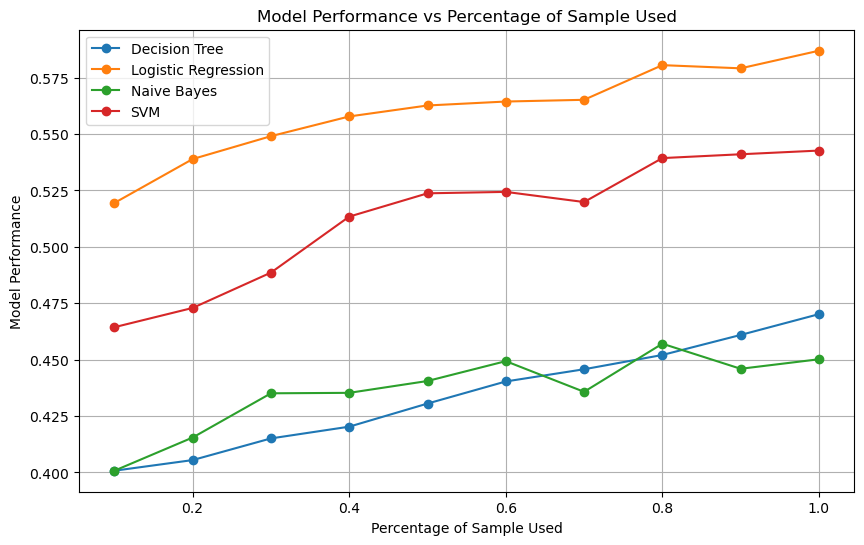

In [193]:
pivot_result_df.T.plot(style='-', marker='o', figsize=(8, 5))
plt.figure(figsize=(10, 6))
plt.xlabel('Percentage of Sample Used')
plt.ylabel('Model Performance')
plt.title('Model Performance vs Percentage of Sample Used')
plt.legend()
plt.grid()

plt.show()

## from Individual Year 2010 to 2017

In [74]:
# Define column names
column_names = ['Year', 'Model', 'Train Accuracy','Test Accuracy','F1 Score','Confusion Matrix']

# Create an empty DataFrame with the defined column names
result_df1 = pd.DataFrame(columns=column_names)
result_df1 = pd.DataFrame()

for i in np.arange(2010,2018,1):
    print('For Year',i)
    sampled_df = filterdf[filterdf['year'].dt.year == i]
    sampled_df = sampled_df.reset_index(drop=True)

    documents = prepare_documents(sampled_df)
    review_documents(documents)
    X_train,X_test,y_train,y_test = split_train_test(documents)
    X_train_bow,X_test_bow = vectorize_doc(X_train,X_test)
    print('---------------')
    print('SVM')
    model_svm, model_svm_acc,test_svm_acc = svm_model(X_train_bow,y_train,X_test_bow,y_test)
    y_pred = model_svm.predict(X_test_bow)
    f1_score_result,cm_svm = f1_and_cm(y_pred)
    
     # Define data to insert
    new_data = {'Year': i,'Model':'SVM', 'Train Accuracy': model_svm_acc, 'Test Accuracy': test_svm_acc,'F1 Score':f1_score_result,'Confusion Matrix':cm_svm}
    # Insert the new data into the DataFrame
    result_df1 = result_df1.append(new_data, ignore_index=True)
    print('---------------')
    print('Decision Tree')
    model_dec,model_dec_acc,test_acc = decision_tree_model(X_train_bow,y_train,X_test_bow,y_test)
    y_pred = model_dec.predict(X_test_bow)
    f1_score_result,cm_svm = f1_and_cm(y_pred)
    # Define data to insert
    new_data1 = {'Year': i,'Model':'Decision Tree', 'Train Accuracy': model_dec_acc, 'Test Accuracy': test_acc,'F1 Score':f1_score_result,'Confusion Matrix':cm_svm}
    # Insert the new data into the DataFrame
    result_df1 = result_df1.append(new_data1, ignore_index=True)
    print('---------------')
    print('Naive Bayes')
    model_gnb,model_gnb_acc,test_acc = gauss_naive(X_train_bow,y_train,X_test_bow,y_test)
    y_pred = model_gnb.predict(X_test_bow.toarray())
    f1_score_result,cm_svm = f1_and_cm(y_pred)
        # Define data to insert
    new_data2 = {'Year': i,'Model':'Naive Bayes', 'Train Accuracy': model_gnb_acc, 'Test Accuracy': test_acc,'F1 Score':f1_score_result,'Confusion Matrix':cm_svm}
    # Insert the new data into the DataFrame
    result_df1 = result_df1.append(new_data2, ignore_index=True)
    
    print('Logistic Regression')
    model_lg,model_lg_acc,test_acc = logistic_ref(X_train_bow,y_train,X_test_bow,y_test)
    y_pred = model_lg.predict(X_test_bow.toarray())
    f1_score_result,cm_svm = f1_and_cm(y_pred)
        # Define data to insert
    new_data3 = {'Year': i,'Model':'Logistic Regression', 'Train Accuracy': model_lg_acc, 'Test Accuracy': test_acc,'F1 Score':f1_score_result,'Confusion Matrix':cm_svm}
    # Insert the new data into the DataFrame
    result_df1 = result_df1.append(new_data3, ignore_index=True)
    
    print('---------------')
    print('---------------')
    print('\n')

For Year 2010
Number of Reviews/Documents: 7122
Corpus Size (words): 1241870
Sample Text of Doc 1:
------------------------------
stupid motherfuckers run duck hide die motherfucker die let em know celph time bust head let go oh yeah army blaaaat hard motherfucking core federate army pharaoh murderer squad run run gonna tear head piece uh huh want beef vinnie enough yo bust em vinnie enough yo bust em bust
Counter({'rock': 1822, 'country': 1586, 'rap': 1500, 'pop': 1492, 'rb': 722})
Counter({'rock': 1208, 'country': 1049, 'rap': 1022, 'pop': 1011, 'rb': 481})
Counter({'rock': 614, 'country': 537, 'pop': 481, 'rap': 478, 'rb': 241})
(4771, 4216)
(2351, 4216)
---------------
SVM
Train Accuracy 0.5156174607878649
Test Accuracy 0.5197788175244576
F1 Score for Each Class
[0.53940455 0.33333333 0.78410311 0.40454545 0.49368155]
Confusion Matrix for SVM
[[308 103   9  17 100]
 [ 91 167  35  58 130]
 [ 27  46 365  18  22]
 [ 35  58  31  89  28]
 [144 147  13  17 293]]
---------------
Decision 

/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data, ignore_index=True)


Train Accuracy 0.4684584060500291
Test Accuracy 0.45980433857932795
F1 Score for Each Class
[0.37021277 0.2699115  0.72805139 0.27118644 0.50573248]
Confusion Matrix for SVM
[[174  88  19  15 241]
 [ 72 122  34  21 232]
 [ 29  40 340  21  48]
 [ 40  75  40  48  38]
 [ 88  98  23   8 397]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data1, ignore_index=True)


Train Accuracy 0.4495893839112252
Test Accuracy 0.45980433857932795
F1 Score for Each Class
[0.45470693 0.18723404 0.69316375 0.25602968 0.42458101]
Confusion Matrix for SVM
[[256  43  89  60  89]
 [121  66 104  84 106]
 [  4  18 436  10  10]
 [ 50  31  64  69  27]
 [158  66  87  75 228]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data2, ignore_index=True)
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

Train Accuracy 0.5801725443709046
Test Accuracy 0.5801786473840919
F1 Score for Each Class
[0.60885276 0.36590909 0.82377477 0.37940379 0.57822639]
Confusion Matrix for SVM
[[337  68   5   4 123]
 [ 86 161  31  37 166]
 [ 20  22 395  10  31]
 [ 33  48  38  70  52]
 [ 94 100  12   7 401]]
---------------
---------------


For Year 2011
Number of Reviews/Documents: 9296
Corpus Size (words): 1685147
Sample Text of Doc 1:
------------------------------
big panorama lie come call life rub everything find find genie inside inside state care thoughtless wrongdoings thoughtless wrongdoings cause know end day theres punishment divine reckless walk right crosshair walk right careless inscribe name heartstone inscribe name loveless already know exit relentless enjoy every second sky limit afraid fall
Counter({'rap': 2670, 'rock': 2324, 'country': 1708, 'pop': 1686, 'rb': 908})
Counter({'rap': 1765, 'rock': 1590, 'pop': 1144, 'country': 1131, 'rb': 598})
Counter({'rap': 905, 'rock': 734, 'country'

/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data, ignore_index=True)


Train Accuracy 0.51011493808299
Test Accuracy 0.5244458930899609
F1 Score for Each Class
[0.38331678 0.30613961 0.81087203 0.31120332 0.52364066]
Confusion Matrix for SVM
[[193 174  18  12 180]
 [ 75 182  35  38 212]
 [ 54  33 716  39  63]
 [ 33  91  51  75  60]
 [ 75 167  41   8 443]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data1, ignore_index=True)


Train Accuracy 0.4675667034107537
Test Accuracy 0.5244458930899609
F1 Score for Each Class
[0.40312772 0.18757921 0.76242096 0.26630435 0.37720706]
Confusion Matrix for SVM
[[232  46 114  85 100]
 [119  74 136 105 108]
 [  7  17 844  14  23]
 [ 40  35  91  98  46]
 [176  75 124 124 235]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data2, ignore_index=True)
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


Train Accuracy 0.5968224744886448
Test Accuracy 0.5925684485006519
F1 Score for Each Class
[0.55677656 0.31557789 0.85002707 0.34135667 0.56618911]
Confusion Matrix for SVM
[[304  72  28  14 159]
 [ 70 157  49  28 238]
 [ 23  27 785  16  54]
 [ 31  75  60  78  66]
 [ 87 122  20  11 494]]
---------------
---------------


For Year 2012


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data3, ignore_index=True)


Number of Reviews/Documents: 10855
Corpus Size (words): 2008905
Sample Text of Doc 1:
------------------------------
todays friend mine hold breath tomorrow scar want say hello say goodbye cloud rainy night sweet snow summer lie even sweet dream well never meet todays gonna cry hang head sorrow scar go know youre say goodbye breath cold outside sweet summer winter mean even sweet dream well never meet
Counter({'rap': 3507, 'rock': 2675, 'pop': 2014, 'country': 1678, 'rb': 981})
Counter({'rap': 2377, 'rock': 1750, 'pop': 1360, 'country': 1123, 'rb': 662})
Counter({'rap': 1130, 'rock': 925, 'pop': 654, 'country': 555, 'rb': 319})
(7272, 6018)
(3583, 6018)
---------------
SVM
Train Accuracy 0.5510186852715817
Test Accuracy 0.5604242255093497
F1 Score for Each Class
[0.51112943 0.32890855 0.84878049 0.28027682 0.49546485]
Confusion Matrix for SVM
[[310 100  15  31  99]
 [113 223  47  60 211]
 [ 24  62 957  37  50]
 [ 50  86  60  81  42]
 [161 231  46  50 437]]
---------------
Decision Tree

/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data, ignore_index=True)


Train Accuracy 0.5328663197152541
Test Accuracy 0.5283282165782863
F1 Score for Each Class
[0.31707317 0.16768916 0.83947249 0.12060302 0.53625883]
Confusion Matrix for SVM
[[143  54  13   4 341]
 [ 44  82  36  10 482]
 [ 37  48 923  24  98]
 [ 40  65  68  24 122]
 [ 83  75  29  17 721]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data1, ignore_index=True)


Train Accuracy 0.4781358215516386
Test Accuracy 0.5283282165782863
F1 Score for Each Class
[0.36941581 0.21581197 0.77834302 0.23113208 0.39154161]
Confusion Matrix for SVM
[[ 215   47  125   95   73]
 [ 140  101  136  157  120]
 [   7   18 1071   13   21]
 [  51   34   96   98   40]
 [ 196   82  194  166  287]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data2, ignore_index=True)
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


Train Accuracy 0.6029995698558781
Test Accuracy 0.6212670946134524
F1 Score for Each Class
[0.57169811 0.34933775 0.87339607 0.2412993  0.60028182]
Confusion Matrix for SVM
[[ 303   79   23    9  141]
 [  64  211   46   29  304]
 [  13   40 1021   10   46]
 [  28   90   75   52   74]
 [  97  134   43   12  639]]
---------------
---------------


For Year 2013


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data3, ignore_index=True)


Number of Reviews/Documents: 13763
Corpus Size (words): 2521573
Sample Text of Doc 1:
------------------------------
harry one way another gonna find ya gonna getcha getcha getcha getcha one way another gonna win ya gonna getcha getcha getcha getcha zayn one way another gonna see ya gonna meet ya meet ya meet ya meet ya one day maybe next week gonna meet ya gonna meet ya
Counter({'rap': 4453, 'rock': 3265, 'pop': 2431, 'country': 2410, 'rb': 1204})
Counter({'rap': 2958, 'rock': 2253, 'country': 1610, 'pop': 1605, 'rb': 795})
Counter({'rap': 1495, 'rock': 1012, 'pop': 826, 'country': 800, 'rb': 409})
(9221, 6822)
(4542, 6822)
---------------
SVM
Train Accuracy 0.5705450034977574
Test Accuracy 0.5623073535887274
F1 Score for Each Class
[0.58614565 0.33048433 0.83708248 0.2179676  0.46077948]
Confusion Matrix for SVM
[[ 495  121   10   33  141]
 [ 151  290   69   75  241]
 [  30  107 1228   45   85]
 [  53  122   79   74   81]
 [ 160  289   53   43  467]]
---------------
Decision Tree


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data, ignore_index=True)


Train Accuracy 0.5357340293576471
Test Accuracy 0.539409951563188
F1 Score for Each Class
[0.4703504  0.19655172 0.81984518 0.17704918 0.51405622]
Confusion Matrix for SVM
[[ 349   55   16   23  357]
 [  93  114   51   44  524]
 [  59   57 1165   63  151]
 [  66   47   66   54  176]
 [ 117   61   49   17  768]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data1, ignore_index=True)


Train Accuracy 0.48367746562498165
Test Accuracy 0.539409951563188
F1 Score for Each Class
[0.4276032  0.21382637 0.78590003 0.24438903 0.33998712]
Confusion Matrix for SVM
[[ 347   66  164  138   85]
 [ 171  133  164  244  114]
 [  23   39 1360   39   34]
 [  63   46  109  147   44]
 [ 219  134  169  226  264]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data2, ignore_index=True)
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


Train Accuracy 0.6118639225437807
Test Accuracy 0.6056803170409512
F1 Score for Each Class
[0.61877757 0.34159411 0.85828877 0.20664207 0.53846154]
Confusion Matrix for SVM
[[ 491   83   13    6  207]
 [ 117  255   65   40  349]
 [  27   50 1284   17  117]
 [  44   99   90   56  120]
 [ 108  180   45   14  665]]
---------------
---------------


For Year 2014


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data3, ignore_index=True)


Number of Reviews/Documents: 15791
Corpus Size (words): 2816316
Sample Text of Doc 1:
------------------------------
cmon guy stop muck around five minutes show thats enough time always time song time tool put wall wear wrist past far behind us future doesnt exist oh whats time quarter nine time bath mean already clean scrub scrub scrub til water brown time ruler measure day doesnt go backwards
Counter({'rap': 4209, 'rock': 3717, 'country': 2967, 'pop': 2842, 'rb': 2056})
Counter({'rap': 2855, 'rock': 2475, 'country': 1982, 'pop': 1875, 'rb': 1392})
Counter({'rap': 1354, 'rock': 1242, 'country': 985, 'pop': 967, 'rb': 664})
(10579, 7053)
(5212, 7053)
---------------
SVM
Train Accuracy 0.5300121555010346
Test Accuracy 0.5402916346891788
F1 Score for Each Class
[0.56366237 0.34160874 0.79669917 0.37381703 0.48928121]
Confusion Matrix for SVM
[[ 591  153   29   43  169]
 [ 179  344   59  120  265]
 [  40   83 1062  115   54]
 [  95  160  105  237   67]
 [ 207  307   57   89  582]]
-------

/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data, ignore_index=True)


Train Accuracy 0.4805736770837522
Test Accuracy 0.48906369915579434
F1 Score for Each Class
[0.42116869 0.31372549 0.77543186 0.24875622 0.47824643]
Confusion Matrix for SVM
[[ 382  195   21   36  351]
 [ 113  312   53   57  432]
 [  89   58 1010   95  102]
 [  99  170  106  125  164]
 [ 146  287   61   28  720]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data1, ignore_index=True)


Train Accuracy 0.4621412451344479
Test Accuracy 0.48906369915579434
F1 Score for Each Class
[0.44201521 0.21142482 0.75164422 0.31304348 0.32996275]
Confusion Matrix for SVM
[[ 465   84  161  166  109]
 [ 234  161  155  293  124]
 [  22   30 1200   63   39]
 [ 100   82  157  270   55]
 [ 298  199  166  269  310]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data2, ignore_index=True)
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


Train Accuracy 0.5882403124678796
Test Accuracy 0.5848042977743668
F1 Score for Each Class
[0.61649485 0.33579126 0.83296703 0.39720035 0.55477528]
Confusion Matrix for SVM
[[ 598  114   17   33  223]
 [ 128  296   59   98  386]
 [  27   42 1137   70   78]
 [  57  133  118  227  129]
 [ 145  211   45   51  790]]
---------------
---------------


For Year 2015
Number of Reviews/Documents: 24976
Corpus Size (words): 4190697
Sample Text of Doc 1:
------------------------------
womens womens womens mommy work nine til five job hat need survive know explain live tell live like get nine feet dashboard posh get lot friends get lot dosh sirens go oh oh sirens go oh oh oh sit watch wait wish tell one thing never know back bus much
Counter({'pop': 6831, 'rap': 5046, 'rock': 4623, 'rb': 4425, 'country': 4051})
Counter({'pop': 4554, 'rap': 3386, 'rock': 3104, 'rb': 2958, 'country': 2731})
Counter({'pop': 2277, 'rap': 1660, 'rock': 1519, 'rb': 1467, 'country': 1320})
(16733, 8519)
(8243, 8519)
----

/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data, ignore_index=True)


Train Accuracy 0.4678772740074124
Test Accuracy 0.47361397549435885
F1 Score for Each Class
[0.36072144 0.51248234 0.73700787 0.32529592 0.25946445]
Confusion Matrix for SVM
[[ 450  663   10  102   95]
 [ 283 1632  103  112  147]
 [  76  173 1170  187   54]
 [ 198  630  198  371   70]
 [ 168  994   34   42  281]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data1, ignore_index=True)


Train Accuracy 0.4128965443713054
Test Accuracy 0.47361397549435885
F1 Score for Each Class
[0.39888034 0.16869919 0.71274298 0.29846939 0.40363522]
Confusion Matrix for SVM
[[ 855  103  127   51  184]
 [1022  249  219  250  537]
 [  43   90 1320  157   50]
 [ 506  117  236  351  257]
 [ 541  116  142   76  644]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data2, ignore_index=True)
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


Train Accuracy 0.5701907534756036
Test Accuracy 0.5774596627441465
F1 Score for Each Class
[0.57188884 0.53093965 0.80965645 0.48875097 0.48816768]
Confusion Matrix for SVM
[[ 710  382   11   59  158]
 [ 211 1390   88  215  373]
 [  27  108 1308  152   65]
 [  72  498  146  630  121]
 [ 143  581   18   55  722]]
---------------
---------------


For Year 2016


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data3, ignore_index=True)


Number of Reviews/Documents: 27500
Corpus Size (words): 4687550
Sample Text of Doc 1:
------------------------------
beaucoup bitch lobby bust open like piata beaucoup bottle counter start party start party start party tell friend tell somebody start party tell niggas ima pull party give minutes way show leather pant bitch aint even know exist toss lot mothafuckin money say let guess drug dealer say nah bring
Counter({'rb': 6383, 'rap': 5900, 'pop': 5482, 'rock': 5372, 'country': 4363})
Counter({'rb': 4315, 'rap': 3923, 'pop': 3614, 'rock': 3612, 'country': 2961})
Counter({'rb': 2068, 'rap': 1977, 'pop': 1868, 'rock': 1760, 'country': 1402})
(18425, 8682)
(9075, 8682)
---------------
SVM
Train Accuracy 0.5203799185888739
Test Accuracy 0.5389531680440771
F1 Score for Each Class
[0.55722071 0.39181135 0.76311606 0.51735776 0.46839499]
Confusion Matrix for SVM
[[ 818  206   17  128  233]
 [ 247  756   78  387  400]
 [  44  117 1440  317   59]
 [ 156  446  216 1073  177]
 [ 269  466   46  

/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data, ignore_index=True)


Train Accuracy 0.4475983717774762
Test Accuracy 0.45487603305785124
F1 Score for Each Class
[0.37117117 0.30893404 0.70964247 0.40358744 0.45466608]
Confusion Matrix for SVM
[[ 515  334   20  102  431]
 [ 269  555   69  238  737]
 [ 114   54 1310  350  149]
 [ 283  368  280  720  417]
 [ 192  414   36   90 1028]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data1, ignore_index=True)


Train Accuracy 0.41242876526458616
Test Accuracy 0.45487603305785124
F1 Score for Each Class
[0.39362863 0.17423958 0.68551402 0.29710611 0.40182129]
Confusion Matrix for SVM
[[ 902   82  157   59  202]
 [ 855  232  210  127  444]
 [  61   62 1467  313   74]
 [ 684  271  323  462  328]
 [ 679  148  146   81  706]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data2, ignore_index=True)
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


Train Accuracy 0.5673270013568521
Test Accuracy 0.5782920110192837
F1 Score for Each Class
[0.58823529 0.39977253 0.80084188 0.55694412 0.53814219]
Confusion Matrix for SVM
[[ 805  175   18  139  265]
 [ 192  703   66  409  498]
 [  29   65 1522  287   74]
 [ 123  354  190 1181  220]
 [ 186  352   28  157 1037]]
---------------
---------------


For Year 2017


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data3, ignore_index=True)


Number of Reviews/Documents: 33032
Corpus Size (words): 5660755
Sample Text of Doc 1:
------------------------------
omnipotent omnipotent secret thats worth keep keep mouth shut weekend hang anybody else pavement always beg whats want keep fall backwards look relief oh free well ive count minutes days count want live life ill never understand wind didnt know afraid want well ive sleep wait something feel nothing avoid
Counter({'rb': 7947, 'pop': 7569, 'rap': 6804, 'rock': 6107, 'country': 4605})
Counter({'rb': 5265, 'pop': 5141, 'rap': 4605, 'rock': 4065, 'country': 3055})
Counter({'rb': 2682, 'pop': 2428, 'rap': 2199, 'rock': 2042, 'country': 1550})
(22131, 9471)
(10901, 9471)
---------------
SVM
Train Accuracy 0.5316526539736699
Test Accuracy 0.540592606182919
F1 Score for Each Class
[0.52297735 0.443671   0.74595095 0.53881808 0.46203038]
Confusion Matrix for SVM
[[ 808  358   25  146  213]
 [ 285 1211  100  443  389]
 [  44  161 1612  323   59]
 [ 126  654  324 1395  183]
 [ 277  

/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data, ignore_index=True)


Train Accuracy 0.45668997425831764
Test Accuracy 0.4565636180166957
F1 Score for Each Class
[0.26086957 0.40774015 0.69647954 0.41074931 0.43774235]
Confusion Matrix for SVM
[[ 270  562   24  323  371]
 [  75 1180   82  430  661]
 [  35  125 1464  441  134]
 [  62  785  370 1047  418]
 [  78  708   65  175 1016]]
---------------
Naive Bayes


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data1, ignore_index=True)


Train Accuracy 0.4006599196015168
Test Accuracy 0.4565636180166957
F1 Score for Each Class
[0.37996357 0.17973568 0.68119891 0.32034413 0.40965583]
Confusion Matrix for SVM
[[1043   86  139   44  238]
 [1178  306  214  186  544]
 [  68   95 1625  328   83]
 [ 864  335  430  633  420]
 [ 787  155  164   79  857]]
Logistic Regression


/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data2, ignore_index=True)
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/siddanta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


Train Accuracy 0.5737204360826138
Test Accuracy 0.5777451609944042
F1 Score for Each Class
[0.56531049 0.47219656 0.77698504 0.56527643 0.52997309]
Confusion Matrix for SVM
[[ 792  366   20  143  229]
 [ 178 1278   90  435  447]
 [  22  124 1688  291   74]
 [  85  622  306 1457  212]
 [ 175  595   42  147 1083]]
---------------
---------------




/var/folders/hh/lb0mt6rs71d6qfq3jqw4mdsr0000gn/T/ipykernel_94139/195843252.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(new_data3, ignore_index=True)


In [75]:
result_df1

,Year,Model,Train Accuracy,Test Accuracy,F1 Score,Confusion Matrix
0,2010,SVM,"[0.5047120418848168, 0.5241090146750524, 0.512...",0.519779,"[0.5394045534150613, 0.3333333333333333, 0.784...","[[308, 103, 9, 17, 100], [91, 167, 35, 58, 130..."
1,2010,Decision Tree,"[0.45340314136125653, 0.4832285115303983, 0.47...",0.459804,"[0.3702127659574468, 0.2699115044247788, 0.728...","[[174, 88, 19, 15, 241], [72, 122, 34, 21, 232..."
2,2010,Naive Bayes,"[0.4586387434554974, 0.449685534591195, 0.4528...",0.459804,"[0.45470692717584366, 0.1872340425531915, 0.69...","[[256, 43, 89, 60, 89], [121, 66, 104, 84, 106..."
3,2010,Logistic Regression,"[0.5769633507853403, 0.590146750524109, 0.5607...",0.580179,"[0.6088527551942186, 0.36590909090909085, 0.82...","[[337, 68, 5, 4, 123], [86, 161, 31, 37, 166],..."
4,2011,SVM,"[0.543338683788122, 0.5200642054574639, 0.5433...",0.530965,"[0.5117408906882591, 0.29662522202486674, 0.82...","[[316, 92, 27, 29, 113], [119, 167, 40, 58, 15..."
5,2011,Decision Tree,"[0.5096308186195827, 0.49919743178170145, 0.52...",0.524446,"[0.3833167825223436, 0.30613961312026916, 0.81...","[[193, 174, 18, 12, 180], [75, 182, 35, 38, 21..."
6,2011,Naive Bayes,"[0.4622792937399679, 0.46468699839486355, 0.47...",0.524446,"[0.40312771503040834, 0.18757921419518378, 0.7...","[[232, 46, 114, 85, 100], [119, 74, 136, 105, ..."
7,2011,Logistic Regression,"[0.593900481540931, 0.5906902086677368, 0.5955...",0.592568,"[0.5567765567765568, 0.3155778894472362, 0.850...","[[304, 72, 28, 14, 159], [70, 157, 49, 28, 238..."
8,2012,SVM,"[0.5518900343642612, 0.5422680412371134, 0.550...",0.560424,"[0.5111294311624073, 0.32890855457227136, 0.84...","[[310, 100, 15, 31, 99], [113, 223, 47, 60, 21..."
9,2012,Decision Tree,"[0.5457044673539518, 0.516151202749141, 0.5323...",0.528328,"[0.3170731707317073, 0.1676891615541922, 0.839...","[[143, 54, 13, 4, 341], [44, 82, 36, 10, 482],..."


In [76]:
pivot_result_df1 = pd.pivot(result_df1, index='Model', columns='Year', values='Test Accuracy')

In [168]:
pivot_result_df1

Year,2010,2011,2012,2013,2014,2015,2016,2017
Model,,,,,,,,
Decision Tree,0.459804,0.524446,0.528328,0.539410,0.489064,0.473614,0.454876,0.456564
Logistic Regression,0.580179,0.592568,0.621267,0.605680,0.584804,0.577460,0.578292,0.577745
Naive Bayes,0.459804,0.524446,0.528328,0.539410,0.489064,0.473614,0.454876,0.456564
SVM,0.519779,0.530965,0.560424,0.562307,0.540292,0.530632,0.538953,0.540593


In [ ]:
Year              2018 TO 2020        2021 to noW 
Decision Tree	0.450176     0.512060
Logistic Regression 0.586967  0.633276
Naive Bayes 0.450176          0.512060
SVM 0.542700          0.589220



Logistic Regression	0.526445	0.600246	0.588597	0.605660	0.622200	0.626948	0.625945	0.625135	0.636314	
Naive Bayes	0.440344	0.501845	0.483183	0.488465	0.486586	0.493437	0.489541	0.492540	0.508340	0.512060
SVM	0.485855	0.551046	0.546349	0.559213	0.576175	0.565012	0.570399	0.576834	0.589281	0.589220

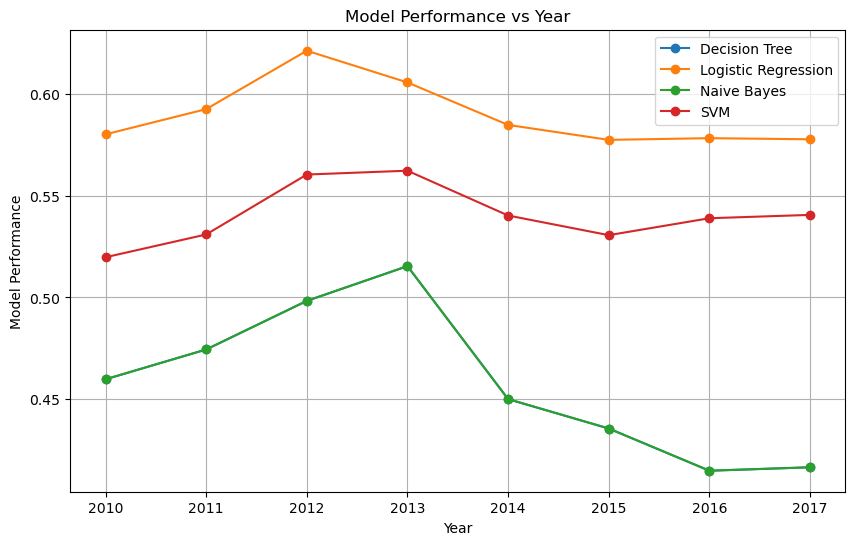

In [195]:
pivot_result_df1.T.plot(style='-', marker='o')

plt.figure(figsize=(10, 6))

plt.plot(df['Year'], df['Decision Tree'], marker='o', label='Decision Tree')
plt.plot(df['Year'], df['Logistic Regression'], marker='o', label='Logistic Regression')
plt.plot(df['Year'], df['Naive Bayes'], marker='o', label='Naive Bayes')
plt.plot(df['Year'], df['SVM'], marker='o', label='SVM')

plt.xlabel('Year')
plt.ylabel('Model Performance')
plt.title('Model Performance vs Year')
plt.legend()
plt.grid()

plt.show()


## 

In [153]:
drinkingKeywords = [#'drink', #causing a relatively high percentage of false positives in the Christian chart 
                    #'shot', #not including as not specific enough to just drinking
                    'drunk', #will only get occurances that are not the past tense verb of 'drink' due to lemmatisation
                    'drank', #will only get occurances that are not the past tense verb of 'drink' due to lemmatisation
                    'alcohol',
                    'alcoholic',
                    'hangover',
                    'hungover',
                    'patron',
                    'liquor',
                    'cocktail',
                    'booze',
                    'boozy',
                    'bottle',
                    'beer',
                    'cider',
                    'ale',
                    'tequila',
                    'vodka',
                    'wine',
                    'gin',
                    'whiskey',
                    'scotch',
                    'rum',
                    'bourbon',
                    'champagne',
                    'mojito',
                    'martini',
                    'daiquiri',
                    'jager',
                    'jagermeister',
                    'budweiser',
                    'miller',
                    'coors',
                    'heineken',
                    'bacardi',
                    'smirnoff',
                    'moet',
                    'hennesey',
                    'bar',
                    'pint',
                    'firewater',
                    'hootch',
                    'moonshine',
                    'spirits',
                    'swig',
                    'tipple']

print('Amount of keywords:', len(drinkingKeywords))

Amount of keywords: 45


In [154]:
drinkingWordsCounter = dict(zip(drinkingKeywords, [0]*len(drinkingKeywords)))

In [97]:
%matplotlib inline
import numpy as np
import pandas as pd
import json
import re
import nltk
nltk.download('stopwords') #make sure list up to date
from nltk.corpus import wordnet
from IPython.display import clear_output
from scipy import stats

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/siddanta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/siddanta/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [94]:
def convertPOSTag(treebank_tag):
    
    if treebank_tag.startswith('J'):
        return wordnet.ADJ #returns 'a'
    elif treebank_tag.startswith('V'):
        return wordnet.VERB #returns 'v'
    elif treebank_tag.startswith('R'):
        return wordnet.ADV #returns 'r'


    else:
        return wordnet.NOUN #returns 'n'

In [99]:
lemmaCorrections = {'wan':'want', #from wanna
                    'gon':'go', #from gonna, gon.
                    'lil':'little',
                    'hol':'hold' #from "hol' up" from LOVE. by Kendrick Lamar
                   }

stopwords = nltk.corpus.stopwords.words('english') #are lowercase
nltkStopwordsWithAdditions = stopwords + \
                             ['la', #comes up a lot (like 'la-la-la') but isn't a word so don't include it
                              'eh', 'ayy', #same as 'la'. 'eh' as in pronounced like 'aye'
                              'oh', 'ooh', #an exclamation with no real meaning but ranks highly so exclude
                              'us', 'u', 'ya', #different forms of 'you' which is a stopword
                              'na', 'ta', #alt forms of 'to' which is a stopword. From 'gonna', 'wanna', 'gotta'
                              'nah', #usage a mix of a sung-only word and slang for 'no' which is a stopword
                              'po', 'woo', 'doo', 'ah', 'uh', 'uhh' #sung-only words
                             ]

In [116]:
import nltk
import pandas as pd
import numpy as np

def getWordTags(lines):
    '''
    return a list of tuples of (word, word type tag) for each word in the passed lines
    '''
    
    try:
        if pd.isnull(lines):
            return
    except ValueError:
        pass
    
    wordTagsList = []
    for line in lines.split():
        words = nltk.word_tokenize(line)
        word_tags = nltk.pos_tag(words)
        
        for wordAndTag in word_tags:
            tag = convertPOSTag(wordAndTag[1])
            word = wordAndTag[0]
            wordTagsList.append((word, tag))
    
    if wordTagsList:
        return wordTagsList
    else:
        return np.nan


In [103]:
import swifter

In [119]:
lemmaSourceWords = {} #will be populated by getLemmasAndWordTags function
filterdf['lemmasAndTags'] = filterdf['processed_lyrics'].swifter.apply(getWordTags)

Pandas Apply:   0%|          | 0/329344 [00:00<?, ?it/s]

In [121]:
filterdf.to_csv('filterdf_lemma_tags.csv', index=False)

In [155]:
def countDrinkWords(lemmasAndTags):
    try:
        if pd.isnull(lemmasAndTags): #causes an ValueError when lines is an array (eg [[x], [y]])
            return np.nan
    except ValueError:
        pass
    
    wordCount = 0
    for lemmaAndTag in lemmasAndTags:
        #lemmaAndTag is tuple in form (lemma, tag) so first item is the lemma
        if lemmaAndTag[0] in drinkingKeywords:
            wordCount += 1
            drinkingWordsCounter[lemmaAndTag[0]] +=1
    return wordCount


In [156]:
filterdf['drinkingWordsCount'] = filterdf.lemmasAndTags.apply(countDrinkWords)
filterdf['hasDrinkingWords'] = filterdf.drinkingWordsCount >0

In [157]:
drinkingWordsCounter

{'drunk': 0,
 'drank': 0,
 'alcohol': 1965,
 'alcoholic': 374,
 'hangover': 727,
 'hungover': 525,
 'patron': 871,
 'liquor': 6549,
 'cocktail': 223,
 'booze': 1278,
 'boozy': 43,
 'bottle': 17964,
 'beer': 8092,
 'cider': 260,
 'ale': 422,
 'tequila': 1805,
 'vodka': 1297,
 'wine': 12890,
 'gin': 2126,
 'whiskey': 7984,
 'scotch': 324,
 'rum': 2377,
 'bourbon': 820,
 'champagne': 4866,
 'mojito': 26,
 'martini': 154,
 'daiquiri': 49,
 'jager': 36,
 'jagermeister': 6,
 'budweiser': 77,
 'miller': 645,
 'coors': 86,
 'heineken': 68,
 'bacardi': 559,
 'smirnoff': 52,
 'moet': 183,
 'hennesey': 44,
 'bar': 19123,
 'pint': 1124,
 'firewater': 42,
 'hootch': 0,
 'moonshine': 1094,
 'spirits': 0,
 'swig': 177,
 'tipple': 6}

In [159]:
filterdf['year']=filterdf['year'].dt.year

In [161]:
entriesFound = filterdf.groupby(['genre', 'year']).genre.count()
entriesFound.name = 'chartEntriesFound'

lyricsFoundCount = filterdf.groupby(['genre', 'year']).processed_lyrics.count()
lyricsFoundCount.name = 'lyricsFound'

In [162]:
containDrinkingWords = filterdf.groupby(['genre', 'year']).hasDrinkingWords.sum()
containDrinkingWords.name = 'songsContainingDrinkingWords'

percentageOfSongsWithDrinking = (filterdf.groupby(['genre', 'year']).hasDrinkingWords.sum() /
                                 filterdf.groupby(['genre', 'year']).title.count())
percentageOfSongsWithDrinking.name = 'percentageOfSongsWithDrinking'

drinkingSongsSummary = pd.concat([entriesFound, 
                                  lyricsFoundCount, 
                                  containDrinkingWords,
                                  percentageOfSongsWithDrinking], 
                                 axis=1)

## Percentage Songs Mentioning Drinking by Chart

genre
country    0.194289
pop        0.076909
rap        0.243954
rb         0.083789
rock       0.069019
dtype: float64


<Axes: ylabel='genre'>

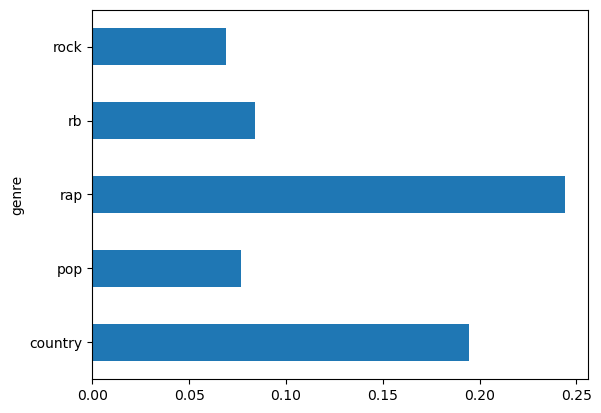

In [163]:
drinkingByChart = (filterdf.groupby(['genre'])['hasDrinkingWords'].sum() /
                   filterdf.groupby(['genre']).processed_lyrics.count())
print(drinkingByChart)
drinkingByChart.plot(kind='barh')

## Percentage Songs Mentioning Drinking by Genre and Year

<Figure size 1000x600 with 0 Axes>

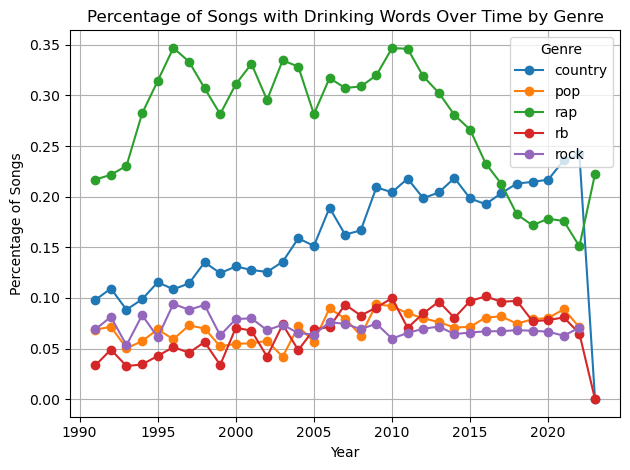

In [164]:
# chartTitle = ('Percentage Songs Mentioning Drinking At Least Once' +
#               '\n(Note: X axis from 0 to 1 so 0.4 = 40%)')

# #the .iloc[::-1] reverses the order of the df and is just cause the 
# #years weren't showing up in the right order
# drinkingSongsSummary.iloc[::-1].\
# Reshape the data for plotting
plot_data = percentageOfSongsWithDrinking.unstack(level=0)

# Plotting
plt.figure(figsize=(10, 6))
plot_data.plot(kind='line', marker='o')
plt.title('Percentage of Songs with Drinking Words Over Time by Genre')
plt.xlabel('Year')
plt.ylabel('Percentage of Songs')
plt.legend(title='Genre')
plt.grid(True)
plt.tight_layout()
plt.show()

In [165]:
filterdf.genre.value_counts()

country    65871
pop        65870
rap        65869
rb         65868
rock       65866
Name: genre, dtype: int64

year
1991    0.083333
1992    0.094654
1993    0.077927
1994    0.095376
1995    0.105129
1996    0.119442
1997    0.116661
1998    0.121082
1999    0.104335
2000    0.121811
2001    0.118500
2002    0.107764
2003    0.118496
2004    0.120907
2005    0.113028
2006    0.137938
2007    0.128754
2008    0.126783
2009    0.150342
2010    0.163156
2011    0.178034
2012    0.173284
2013    0.172491
2014    0.154138
2015    0.134809
2016    0.133200
2017    0.126453
2018    0.122648
2019    0.120791
2020    0.128194
2021    0.142402
2022    0.157379
2023    0.181818
dtype: float64


<Axes: xlabel='year'>

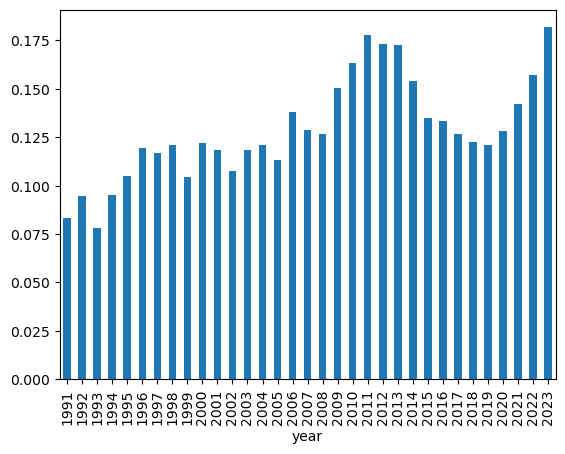

In [166]:
drinkingByYear = (filterdf.groupby(['year'])['hasDrinkingWords'].sum() / \
                  filterdf.groupby(['year']).processed_lyrics.count())
print(drinkingByYear)

drinkingByYear.plot(kind='bar')